In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker

plt.rcParams.update({
    'font.size': 12,
    'font.family': 'serif',
    'axes.labelsize': 13,
    'legend.fontsize': 11,
    'xtick.labelsize': 11,
    'ytick.labelsize': 11,
    'text.usetex': False,  # Mude para True se tiver LaTeX instalado no sistema
    'figure.dpi': 300      # Alta resolução para publicação
})

# Experiment 1 - BMSSP-WC X Dijkstra

In [2]:
df_d3 = pd.read_csv("outputs/results_D3/performance_summary_table.csv")
df_h3 = pd.read_csv("outputs/results_H3/performance_summary_table.csv")
df_USA = pd.read_csv("outputs/results_USA/performance_summary_table.csv")
df_gridED = pd.read_csv("outputs/results_GridED/performance_summary_table.csv")

In [3]:
df_gridED.head()

Graph File  Número de Vértices  Número de Arestas  \
0    random8X32RGridED.gr                 256               1812   
1   random16X16SGridED.gr                 256               1860   
2   random16X64RGridED.gr                1024               7716   
3   random32X32SGridED.gr                1024               7812   
4  random32X128RGridED.gr                4096              31812   

   Tempo Dijkstra (ms)  Desvio Dijkstra (ms)  Tempo BMSPP (ms)  \
0                0.008                 0.003             0.156   
1                0.011                 0.003             0.171   
2                0.041                 0.005             0.566   
3                0.062                 0.014             0.597   
4                0.188                 0.008             1.936   

   Desvio BMSPP (ms)  Ratio BMSPP / Dijkstra  
0              0.017                  19.500  
1              0.010                  15.545  
2              0.057                  13.805  
3              0.010                   9.629  
4              0.032                  10.298

In [4]:
df_USA[df_USA['Número de Vértices'] > 1000].mean()

Número de Vértices        4.780240e+06
Número de Arestas         1.168644e+07
Tempo Dijkstra (ms)       8.944446e+02
Desvio Dijkstra (ms)      3.245083e+00
Tempo BMSPP (ms)          3.582271e+03
Desvio BMSPP (ms)         6.485083e+00
Ratio BMSPP / Dijkstra    3.690333e+00
dtype: float64

In [5]:
df_d3.columns

Index(['Graph File', 'Número de Vértices', 'Número de Arestas',
       'Tempo Dijkstra (ms)', 'Desvio Dijkstra (ms)', 'Tempo BMSPP (ms)',
       'Desvio BMSPP (ms)', 'Ratio BMSPP / Dijkstra'],
      dtype='object')

In [6]:
c1 = '#377eb8'
c2 = '#e41a1c'

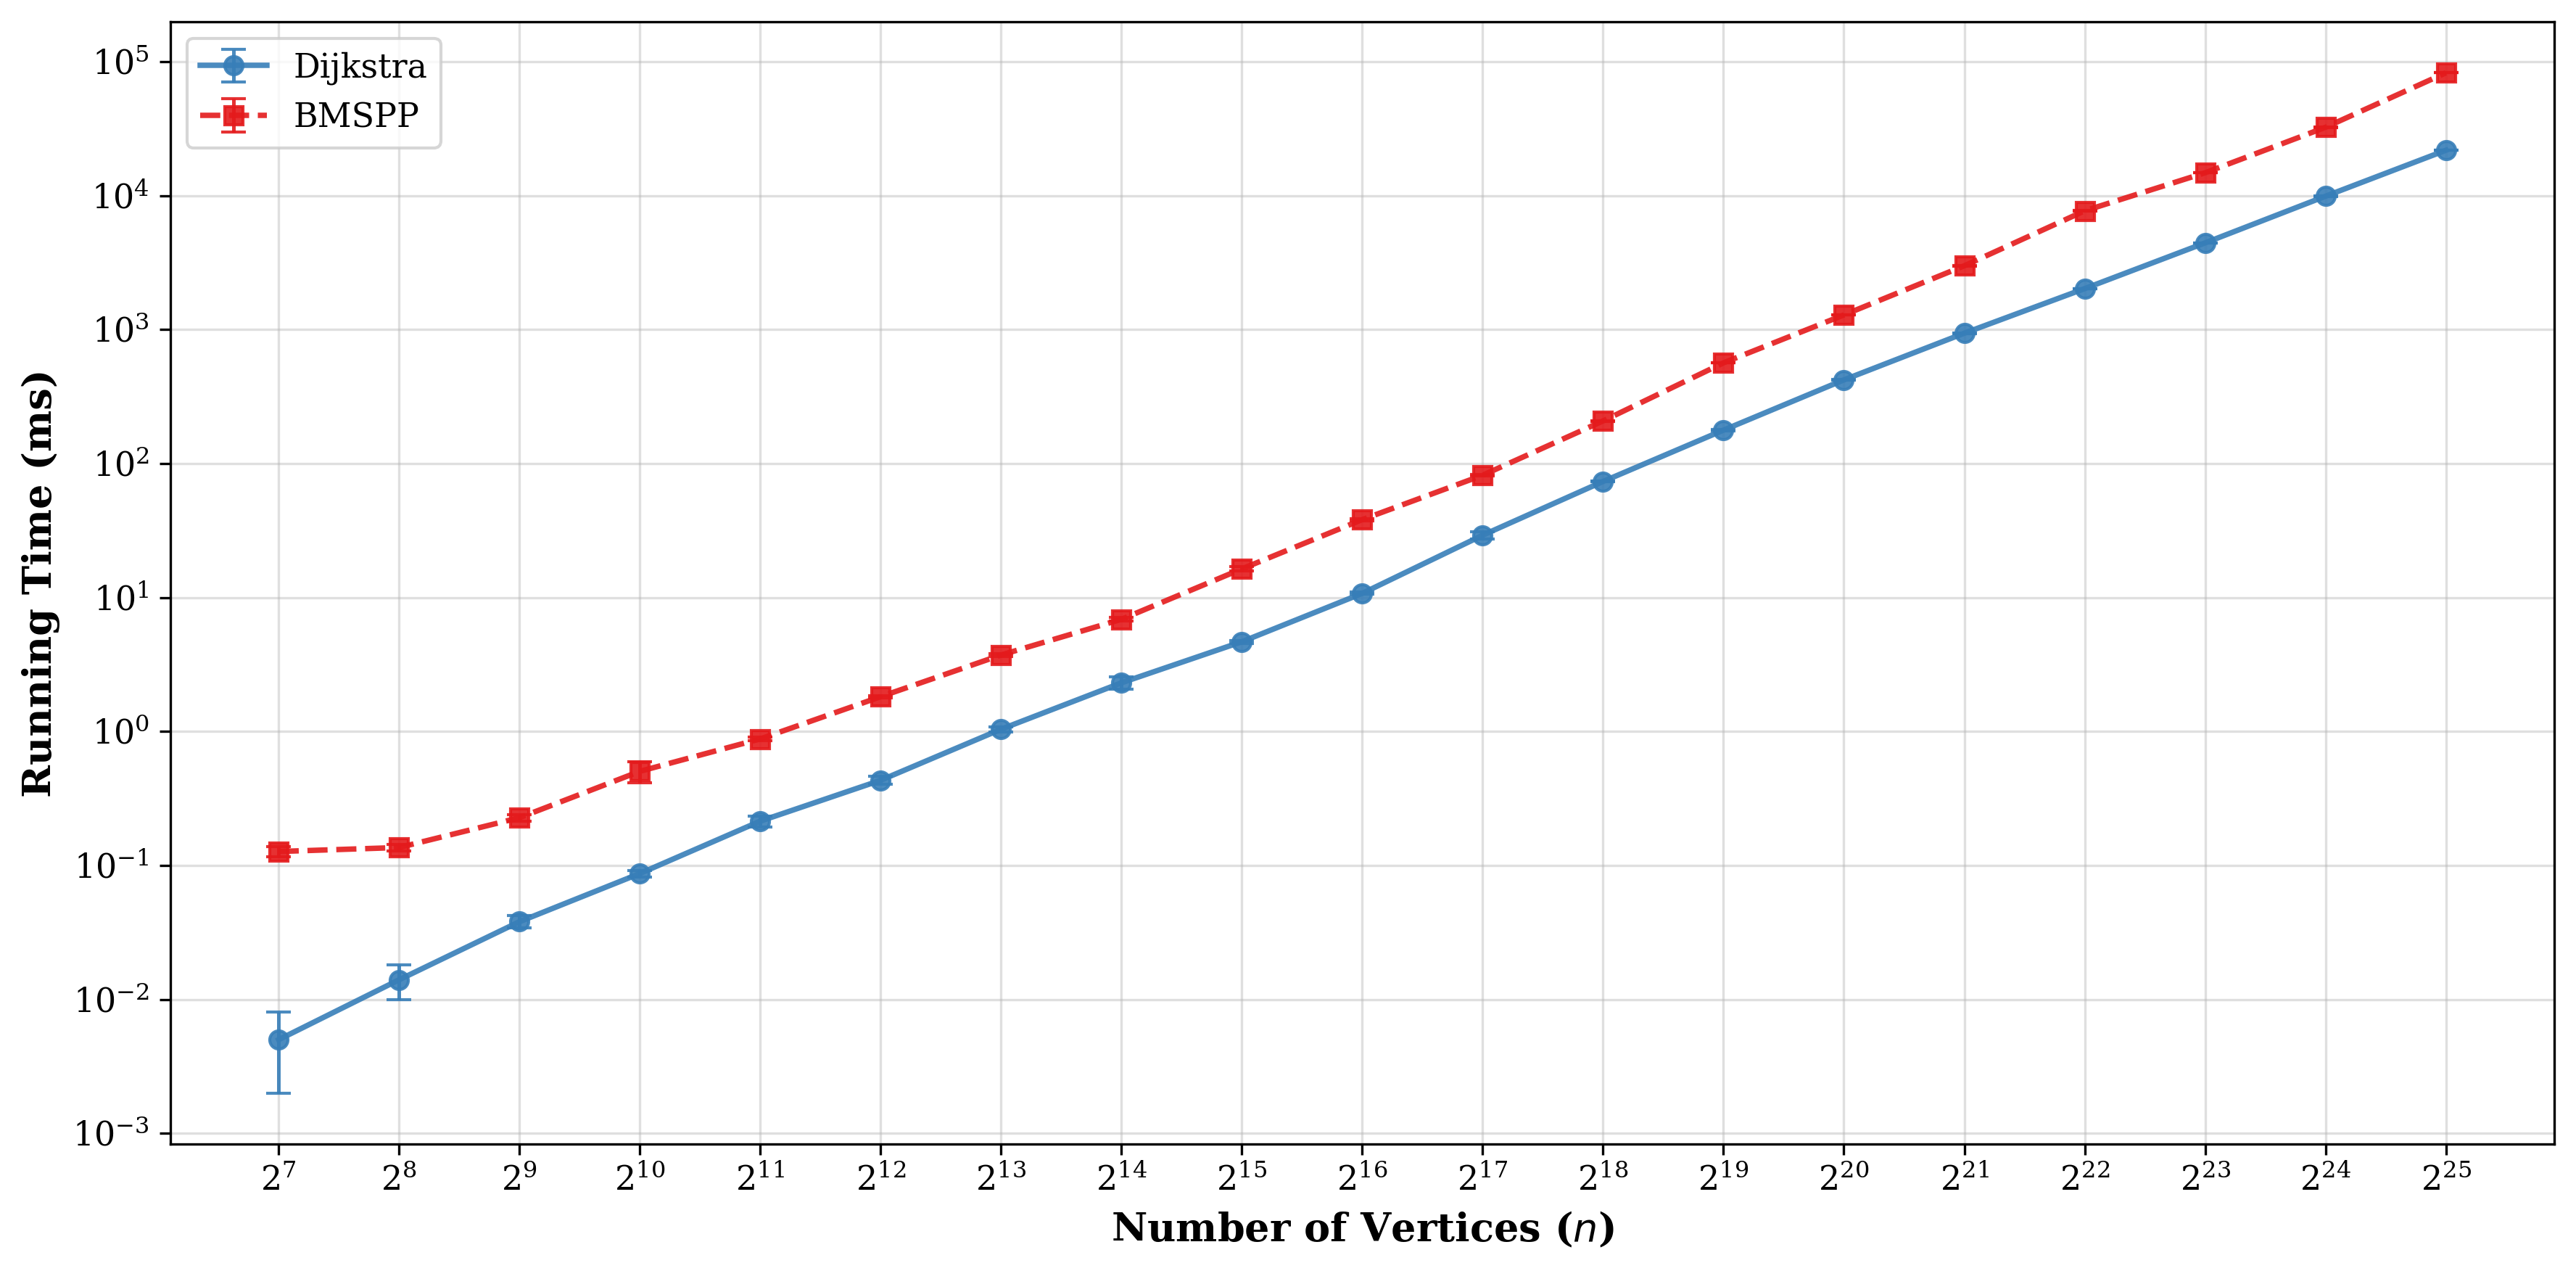

In [7]:
plt.figure(figsize=(12,6))

plt.errorbar(
    df_d3['Número de Vértices'], 
    df_d3['Tempo Dijkstra (ms)'], 
    yerr=df_d3['Desvio Dijkstra (ms)'], 
    linestyle='-', 
    marker='o', 
    color=c1,
    capsize=4, 
    elinewidth=1.2,
    linewidth=1.8,
    markersize=6, 
    label='Dijkstra',
    alpha=0.9
)

plt.errorbar(
    df_d3['Número de Vértices'], 
    df_d3['Tempo BMSPP (ms)'], 
    yerr=df_d3['Desvio BMSPP (ms)'], 
    linestyle='--', 
    marker='s', 
    color=c2,
    capsize=4, 
    elinewidth=1.2,
    linewidth=1.8,
    markersize=6, 
    label='BMSPP',
    alpha=0.9
)

plt.yscale('log')
plt.gca().yaxis.set_major_locator(ticker.LogLocator(base=10.0, subs=[1.0], numticks=20))

plt.xscale('log', base=2)
plt.gca().xaxis.set_major_locator(ticker.LogLocator(base=2.0, subs=[1.0],numticks=20))
plt.gca().xaxis.set_major_formatter(ticker.LogFormatterMathtext(base=2.0))


plt.xlabel('Number of Vertices ($n$)', fontweight='bold')
plt.ylabel('Running Time (ms)', fontweight='bold')
plt.legend()
plt.grid(True, which="major", linestyle='-', alpha=0.4)
plt.grid(True, which="minor", linestyle=':', alpha=0.2)

plt.legend(loc='upper left', frameon=True, fancybox=True, shadow=False)

plt.tight_layout()
plt.show()

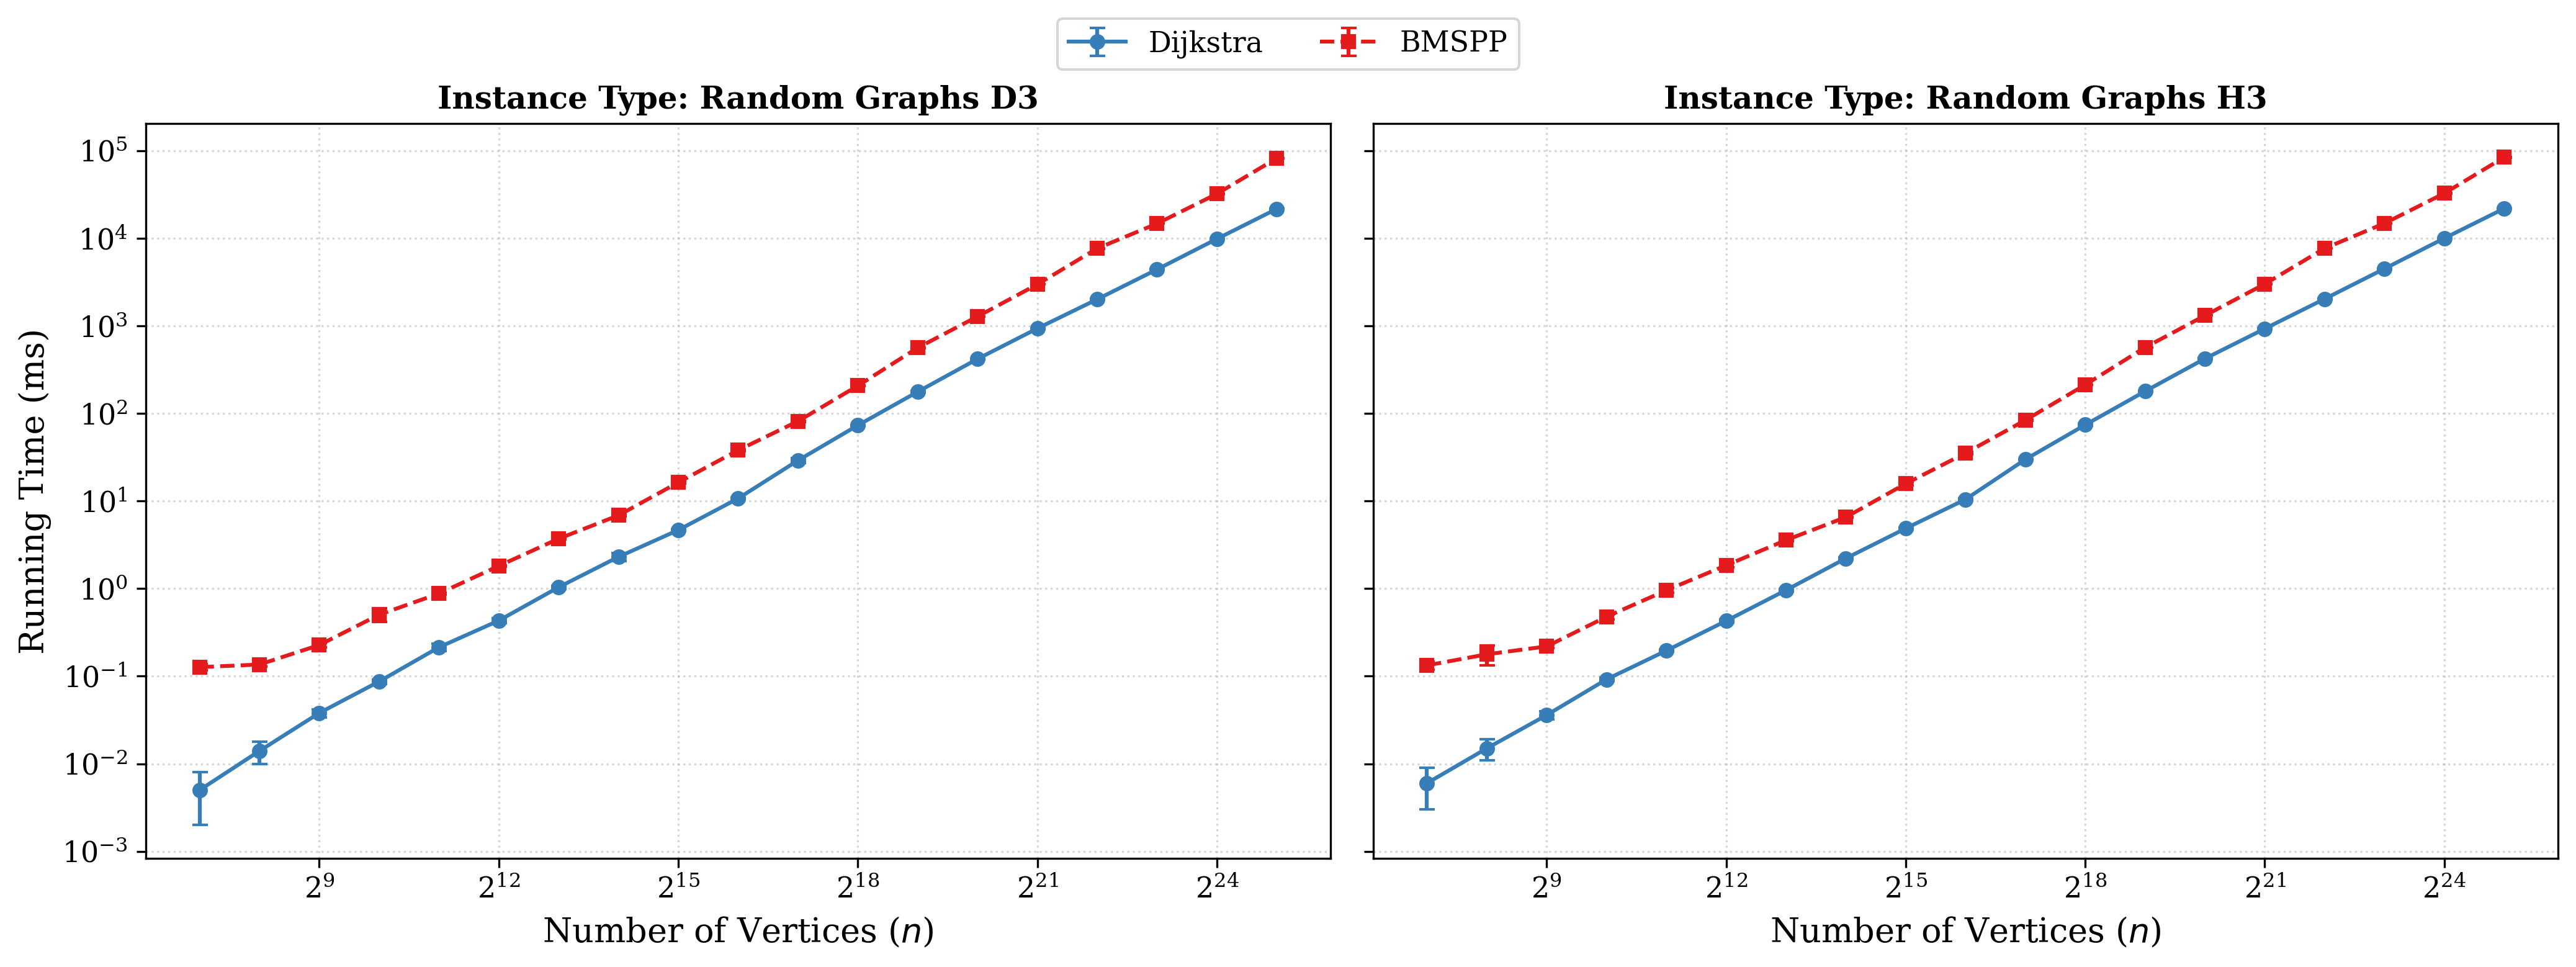

In [8]:
# Configurações globais para estilo acadêmico
plt.rcParams.update({
    'font.size': 12,
    'font.family': 'serif',
    'axes.labelsize': 13,
    'text.usetex': False,
    'figure.dpi': 300
})

color_dijkstra = '#377eb8'
color_bmspp = '#e41a1c'

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

def plot_data(ax, df, title):
    ax.errorbar(df['Número de Vértices'], df['Tempo Dijkstra (ms)'], 
                yerr=df['Desvio Dijkstra (ms)'], linestyle='-', marker='o', 
                color=color_dijkstra, capsize=3, label='Dijkstra', markersize=5)
    
    ax.errorbar(df['Número de Vértices'], df['Tempo BMSPP (ms)'], 
                yerr=df['Desvio BMSPP (ms)'], linestyle='--', marker='s', 
                color=color_bmspp, capsize=3, label='BMSPP', markersize=5)
    
    # Configurações de Escala
    ax.set_xscale('log', base=2)
    ax.set_yscale('log')
    plt.gca().yaxis.set_major_locator(ticker.LogLocator(base=10.0, subs=[1.0], numticks=20))
    
    ax.xaxis.set_major_formatter(ticker.LogFormatterMathtext(base=2.0))
    ax.yaxis.set_major_formatter(ticker.LogFormatterMathtext(base=10.0))
    
    ax.set_title(title, fontsize=12, fontweight='bold')
    ax.set_xlabel('Number of Vertices ($n$)')
    ax.grid(True, which="both", ls=":", alpha=0.5)

plot_data(ax1, df_d3, "Instance Type: Random Graphs D3")
ax1.set_ylabel('Running Time (ms)')

plot_data(ax2, df_h3, "Instance Type: Random Graphs H3")

handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=2, bbox_to_anchor=(0.5, 1.05))

plt.tight_layout()
plt.savefig('fig1.png', bbox_inches='tight')
plt.show()

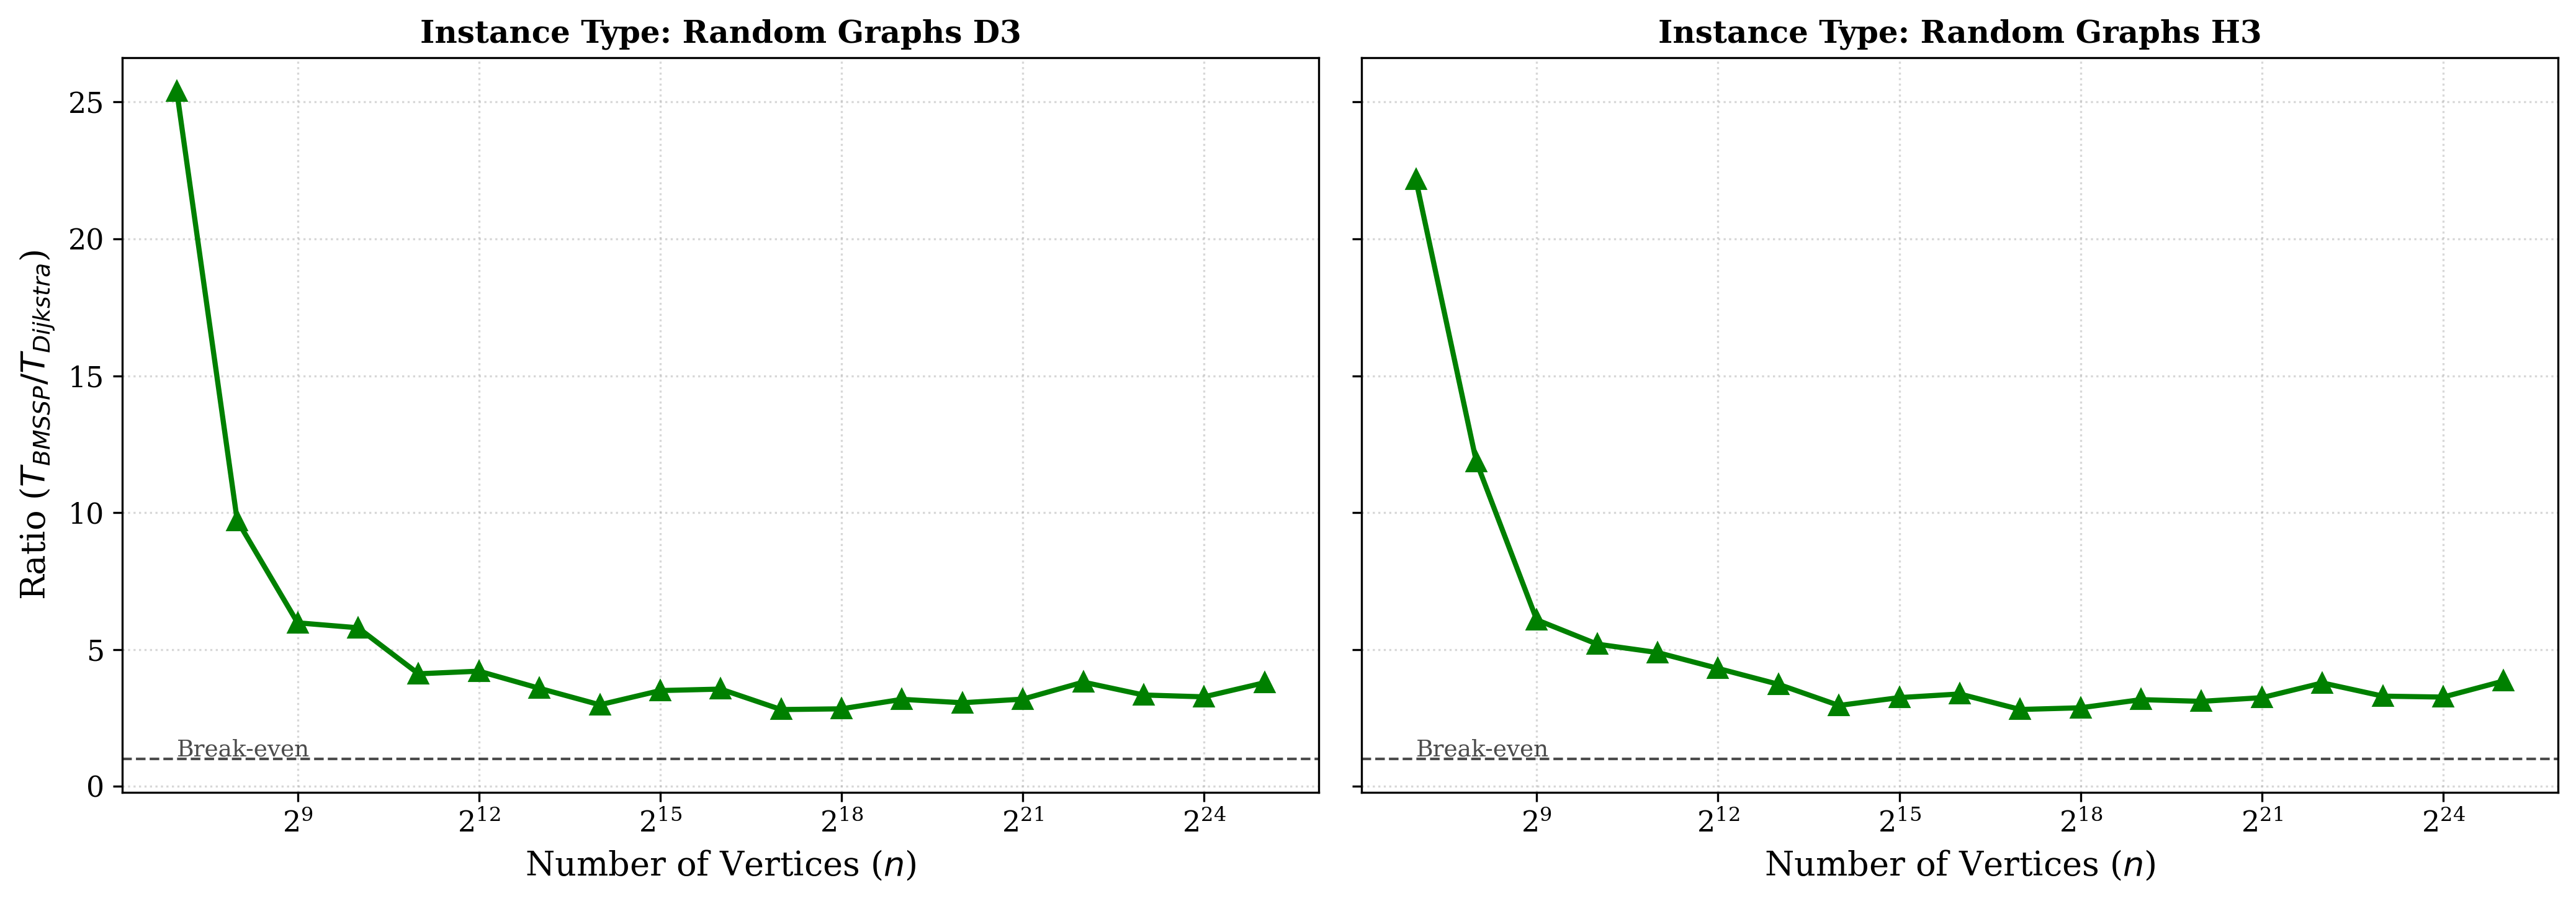

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

def plot_ratio(ax, df, title):
    # Cálculo do Ratio (ajuste os nomes das colunas se necessário)
    # Se você já tem a coluna 'Ratio BMSPP / Dijkstra', use-a diretamente
    
    ax.plot(df['Número de Vértices'], df['Ratio BMSPP / Dijkstra'], 
            linestyle='-', marker='^', color='green', 
            linewidth=2, markersize=7, label='Speedup (Dijkstra / BMSPP)')
    
    ax.axhline(y=1, color='black', linestyle='--', linewidth=1, alpha=0.7)
    ax.text(df['Número de Vértices'].min(), 1.1, 'Break-even', fontsize=9, alpha=0.7)

    ax.set_xscale('log', base=2)
    ax.xaxis.set_major_formatter(ticker.LogFormatterMathtext(base=2.0))
    
    ax.set_yscale('linear') 
    
    ax.set_title(title, fontsize=12, fontweight='bold')
    ax.set_xlabel('Number of Vertices ($n$)')
    ax.grid(True, which="both", ls=":", alpha=0.5)


plot_ratio(ax1, df_d3, "Instance Type: Random Graphs D3")
ax1.set_ylabel('Ratio ($T_{BMSSP} / T_{Dijkstra}$)')

plot_ratio(ax2, df_h3, "Instance Type: Random Graphs H3")

plt.tight_layout()
plt.savefig('fig2.png', bbox_inches='tight')
plt.show()

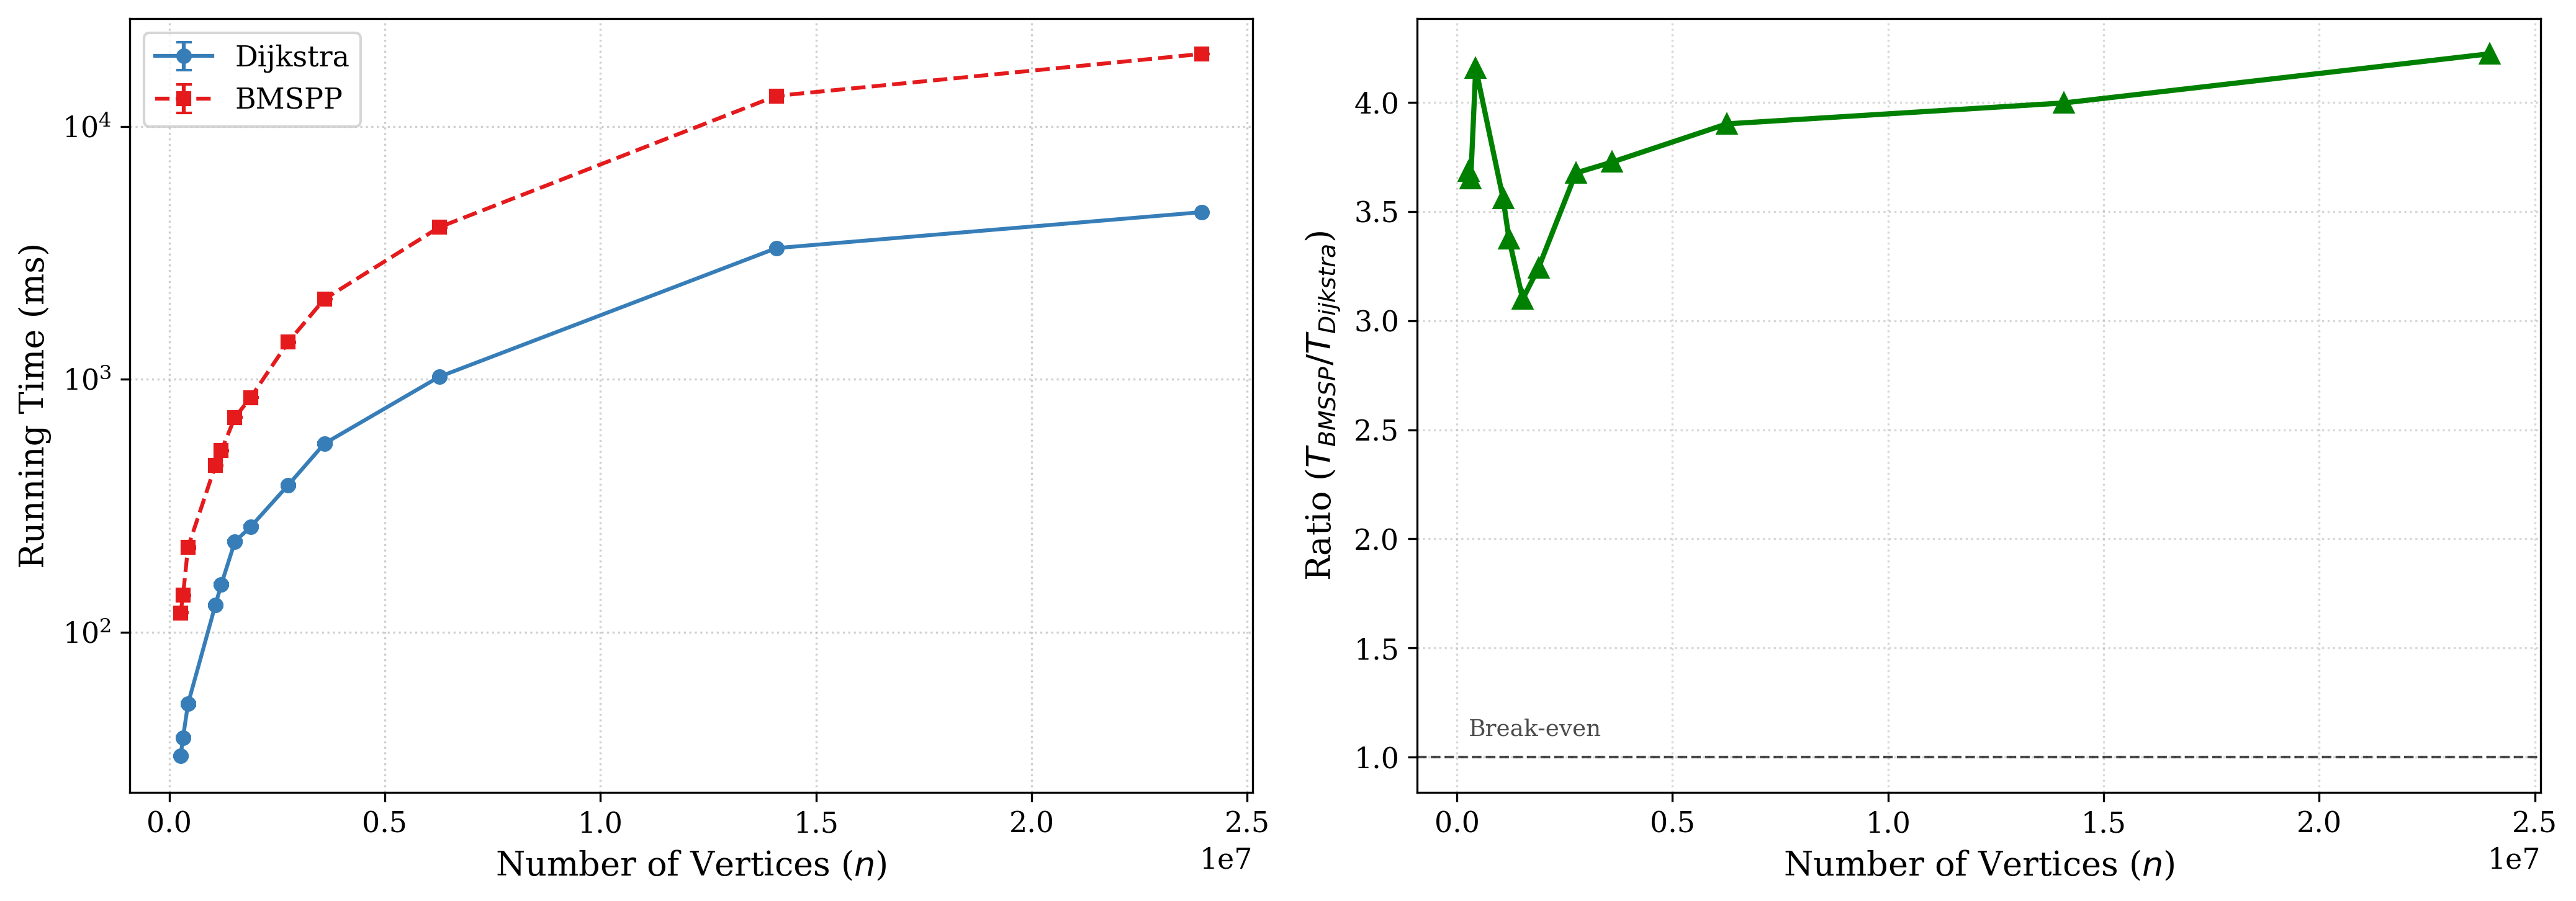

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5), sharey=False)

plot_data(ax1, df_USA, "")
ax1.legend()
ax1.yaxis.set_major_locator(ticker.LogLocator(base=10.0, subs=[1.0], numticks=20))
ax1.yaxis.set_major_formatter(ticker.LogFormatterMathtext(base=10.0))
ax1.yaxis.set_minor_locator(ticker.NullLocator())
ax1.grid(True, which='major', linestyle=':', alpha=0.6)
ax1.grid(False, which='minor')
ax1.set_xscale('linear')

ax1.set_ylabel('Running Time (ms)')

plot_ratio(ax2, df_USA, "")
ax2.set_ylabel('Ratio ($T_{BMSSP} / T_{Dijkstra}$)')
ax2.set_xscale('linear')

plt.tight_layout()
plt.savefig('fig3.png', bbox_inches='tight')
plt.show()

In [11]:
df_gridED

Graph File  Número de Vértices  Número de Arestas  \
0        random8X32RGridED.gr                 256               1812   
1       random16X16SGridED.gr                 256               1860   
2       random16X64RGridED.gr                1024               7716   
3       random32X32SGridED.gr                1024               7812   
4      random32X128RGridED.gr                4096              31812   
5       random64X64SGridED.gr                4096              32004   
6      random64X256RGridED.gr               16384             129156   
7     random128X128SGridED.gr               16384             129540   
8     random256X256SGridED.gr               65536             521220   
9     random128X512RGridED.gr               65536             520452   
10   random256X1024RGridED.gr              262144            2089476   
11    random512X512SGridED.gr              262144            2091012   
12   random512X2048RGridED.gr             1048576            8373252   
13  random1024X1024SGridED.gr             1048576            8376324   
14  random1024X4096RGridED.gr             4194304           33523716   
15  random2048X2048SGridED.gr             4194304           33529860   
16  random2048X8192RGridED.gr            16777216          134156292   
17  random4096X4096SGridED.gr            16777216          134168580   

    Tempo Dijkstra (ms)  Desvio Dijkstra (ms)  Tempo BMSPP (ms)  \
0                 0.008                 0.003             0.156   
1                 0.011                 0.003             0.171   
2                 0.041                 0.005             0.566   
3                 0.062                 0.014             0.597   
4                 0.188                 0.008             1.936   
5                 0.229                 0.009             2.044   
6                 0.974                 0.040             7.599   
7                 1.106                 0.038             7.820   
8                 5.716                 0.274            34.051   
9                 5.192                 0.303            30.090   
10               25.949                 0.450           140.170   
11               28.915                 0.418           143.240   
12              118.815                 2.519           687.064   
13              130.519                 1.919           695.658   
14              568.527                 1.921          3952.861   
15              600.892                 1.737          4019.613   
16             2735.445                57.591         16102.537   
17             2752.005                 7.649         16074.777   

    Desvio BMSPP (ms)  Ratio BMSPP / Dijkstra  
0               0.017                  19.500  
1               0.010                  15.545  
2               0.057                  13.805  
3               0.010                   9.629  
4               0.032                  10.298  
5               0.054                   8.926  
6               0.218                   7.802  
7               0.103                   7.071  
8               0.433                   5.957  
9               0.450                   5.795  
10              0.712                   5.402  
11              0.463                   4.954  
12              0.898                   5.783  
13              0.807                   5.330  
14              6.157                   6.953  
15              1.058                   6.689  
16              3.923                   5.887  
17              5.753                   5.841

In [12]:
df_SgridED = df_gridED[df_gridED['Graph File'].apply(lambda x: "SGrid" in x)]
df_RgridED = df_gridED[df_gridED['Graph File'].apply(lambda x: "RGrid" in x)]

In [13]:
df_SgridED

Graph File  Número de Vértices  Número de Arestas  \
1       random16X16SGridED.gr                 256               1860   
3       random32X32SGridED.gr                1024               7812   
5       random64X64SGridED.gr                4096              32004   
7     random128X128SGridED.gr               16384             129540   
8     random256X256SGridED.gr               65536             521220   
11    random512X512SGridED.gr              262144            2091012   
13  random1024X1024SGridED.gr             1048576            8376324   
15  random2048X2048SGridED.gr             4194304           33529860   
17  random4096X4096SGridED.gr            16777216          134168580   

    Tempo Dijkstra (ms)  Desvio Dijkstra (ms)  Tempo BMSPP (ms)  \
1                 0.011                 0.003             0.171   
3                 0.062                 0.014             0.597   
5                 0.229                 0.009             2.044   
7                 1.106                 0.038             7.820   
8                 5.716                 0.274            34.051   
11               28.915                 0.418           143.240   
13              130.519                 1.919           695.658   
15              600.892                 1.737          4019.613   
17             2752.005                 7.649         16074.777   

    Desvio BMSPP (ms)  Ratio BMSPP / Dijkstra  
1               0.010                  15.545  
3               0.010                   9.629  
5               0.054                   8.926  
7               0.103                   7.071  
8               0.433                   5.957  
11              0.463                   4.954  
13              0.807                   5.330  
15              1.058                   6.689  
17              5.753                   5.841

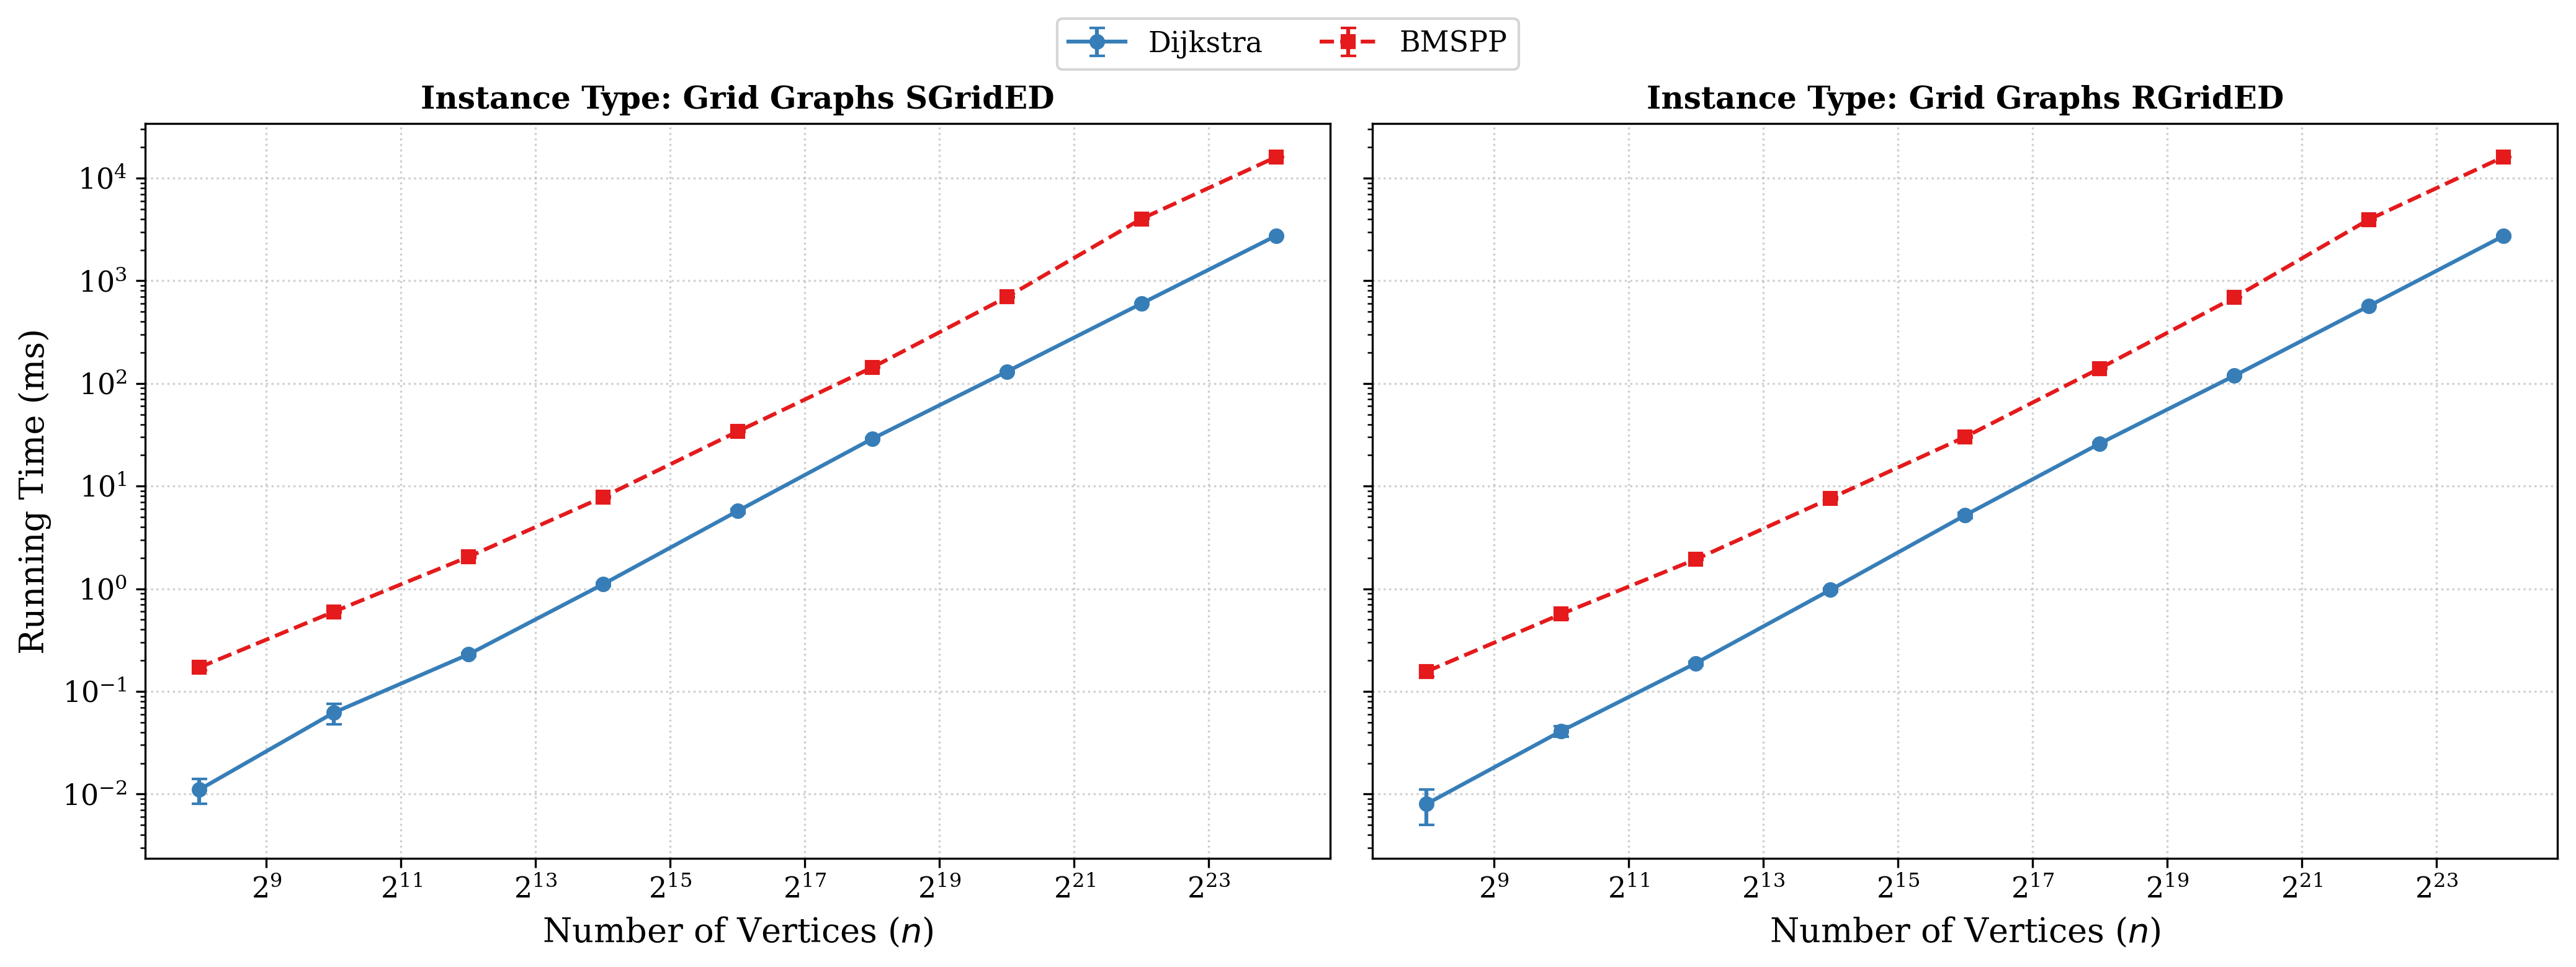

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

plot_data(ax1, df_SgridED, "Instance Type: Grid Graphs SGridED")
ax1.set_ylabel('Running Time (ms)')

ax1.grid(True, which='major', linestyle=':', alpha=0.6)
ax1.grid(False, which='minor')

plot_data(ax2, df_RgridED, "Instance Type: Grid Graphs RGridED")
ax2.grid(True, which='major', linestyle=':', alpha=0.6)
ax2.grid(False, which='minor')

handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=2, bbox_to_anchor=(0.5, 1.05))

plt.tight_layout()
plt.savefig('fig4.png', bbox_inches='tight')
plt.show()

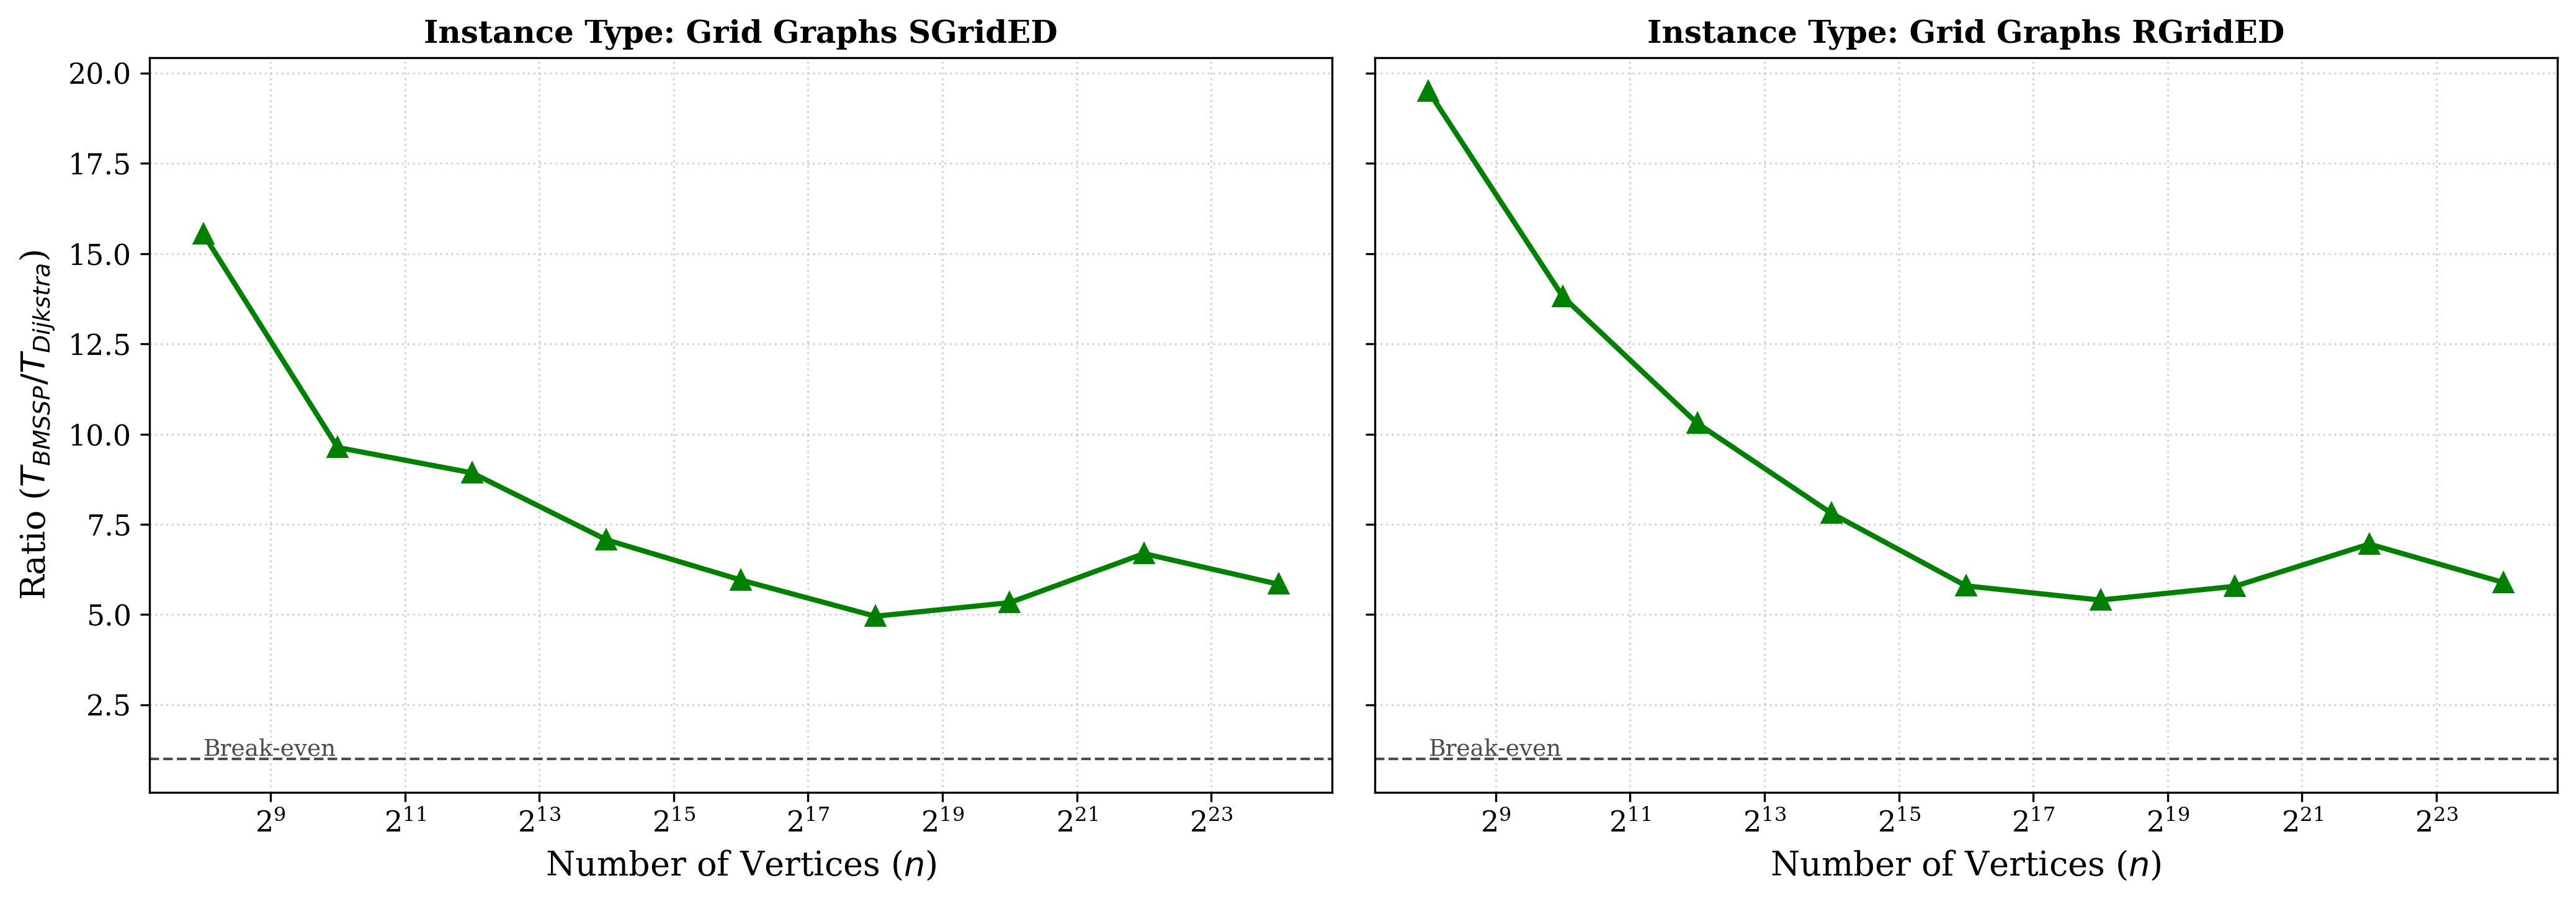

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5), sharey=True)


plot_ratio(ax1, df_SgridED, "Instance Type: Grid Graphs SGridED")
ax1.set_ylabel('Ratio ($T_{BMSSP} / T_{Dijkstra}$)')

plot_ratio(ax2, df_RgridED, "Instance Type: Grid Graphs RGridED")

plt.tight_layout()
plt.savefig('fig5.png', bbox_inches='tight')
plt.show()

# Experiment 3 - BMSSP-WC X BMSSP-Expected

In [31]:
df_d3 = pd.read_csv("outputs/Ex_results_D3/performance_summary_table.csv")
df_h3 = pd.read_csv("outputs/Ex_results_H3/performance_summary_table.csv")
df_USA = pd.read_csv("outputs/Ex_results_USA/performance_summary_table.csv")
df_gridED = pd.read_csv("outputs/Ex_results_GridED/performance_summary_table.csv")

In [32]:
df_SgridED = df_gridED[df_gridED['Graph File'].apply(lambda x: "SGrid" in x)]
df_RgridED = df_gridED[df_gridED['Graph File'].apply(lambda x: "RGrid" in x)]

In [33]:
df_d3.head()

Graph File  Número de Vértices  Número de Arestas  Tempo BMSSP (ms)  \
0   random128D3.gr                 128                384             0.126   
1   random256D3.gr                 256                768             0.137   
2   random512D3.gr                 512               1536             0.209   
3  random1024D3.gr                1024               3072             0.482   
4  random2048D3.gr                2048               6144             0.858   

   Desvio BMSSP (ms)  Tempo BMSSP-Expected (ms)  Desvio BMSSP-Expected (ms)  \
0              0.010                      0.156                       0.016   
1              0.009                      0.172                       0.018   
2              0.009                      0.257                       0.018   
3              0.035                      0.569                       0.060   
4              0.026                      1.117                       0.127   

   Ratio BMSSP-Expected / BMSSP  
0                      1.238095  
1                      1.255474  
2                      1.229665  
3                      1.180498  
4                      1.301865

In [34]:
df_h3.head()

Graph File  Número de Vértices  Número de Arestas  Tempo BMSSP (ms)  \
0   H3random128.gr                 128                384             0.129   
1   H3random256.gr                 256                768             0.138   
2   H3random512.gr                 512               1536             0.216   
3  H3random1024.gr                1024               3072             0.479   
4  H3random2048.gr                2048               6144             0.869   

   Desvio BMSSP (ms)  Tempo BMSSP-Expected (ms)  Desvio BMSSP-Expected (ms)  \
0              0.009                      0.170                       0.022   
1              0.009                      0.173                       0.017   
2              0.009                      0.264                       0.016   
3              0.008                      0.581                       0.033   
4              0.029                      1.080                       0.117   

   Ratio BMSSP-Expected / BMSSP  
0                      1.317829  
1                      1.253623  
2                      1.222222  
3                      1.212944  
4                      1.242808

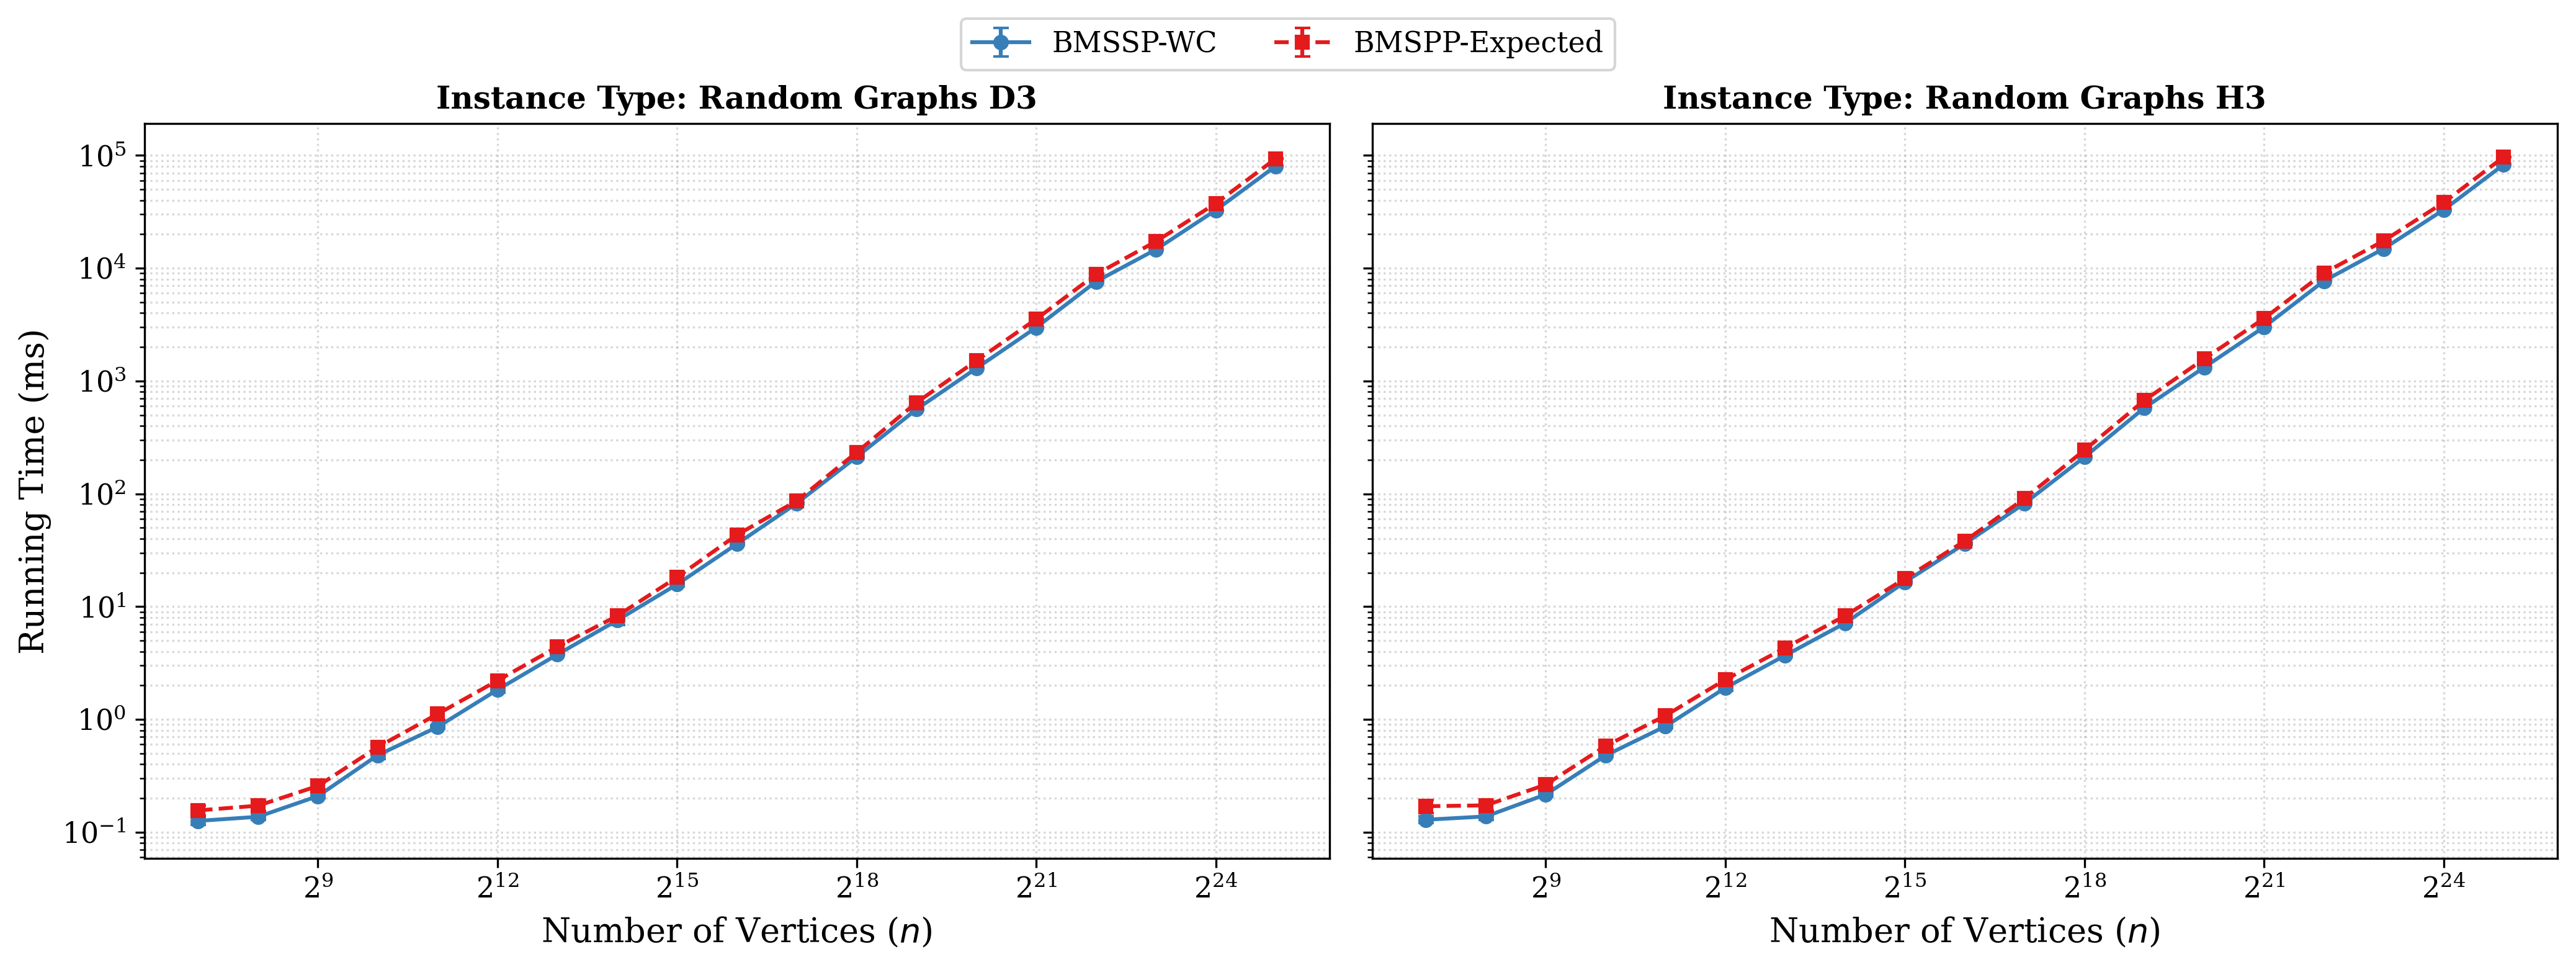

In [35]:
# Configurações globais para estilo acadêmico
plt.rcParams.update({
    'font.size': 12,
    'font.family': 'serif',
    'axes.labelsize': 13,
    'text.usetex': False,
    'figure.dpi': 300
})

color_dijkstra = '#377eb8'
color_bmspp = '#e41a1c'

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

def plot_data(ax, df, title):
    ax.errorbar(df['Número de Vértices'], df['Tempo BMSSP (ms)'], 
                yerr=df['Desvio BMSSP (ms)'], linestyle='-', marker='o', 
                color=color_dijkstra, capsize=3, label='BMSSP-WC', markersize=5)
    
    ax.errorbar(df['Número de Vértices'], df['Tempo BMSSP-Expected (ms)'], 
                yerr=df['Desvio BMSSP-Expected (ms)'], linestyle='--', marker='s', 
                color=color_bmspp, capsize=3, label='BMSPP-Expected', markersize=5)
    
    # Configurações de Escala
    ax.set_xscale('log', base=2)
    ax.set_yscale('log')
    plt.gca().yaxis.set_major_locator(ticker.LogLocator(base=10.0, subs=[1.0], numticks=20))
    
    ax.xaxis.set_major_formatter(ticker.LogFormatterMathtext(base=2.0))
    ax.yaxis.set_major_formatter(ticker.LogFormatterMathtext(base=10.0))
    
    ax.set_title(title, fontsize=12, fontweight='bold')
    ax.set_xlabel('Number of Vertices ($n$)')
    ax.grid(True, which="both", ls=":", alpha=0.5)

plot_data(ax1, df_d3, "Instance Type: Random Graphs D3")
ax1.set_ylabel('Running Time (ms)')

plot_data(ax2, df_h3, "Instance Type: Random Graphs H3")

handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=2, bbox_to_anchor=(0.5, 1.05))

plt.tight_layout()
plt.savefig('fig1.png', bbox_inches='tight')
plt.show()

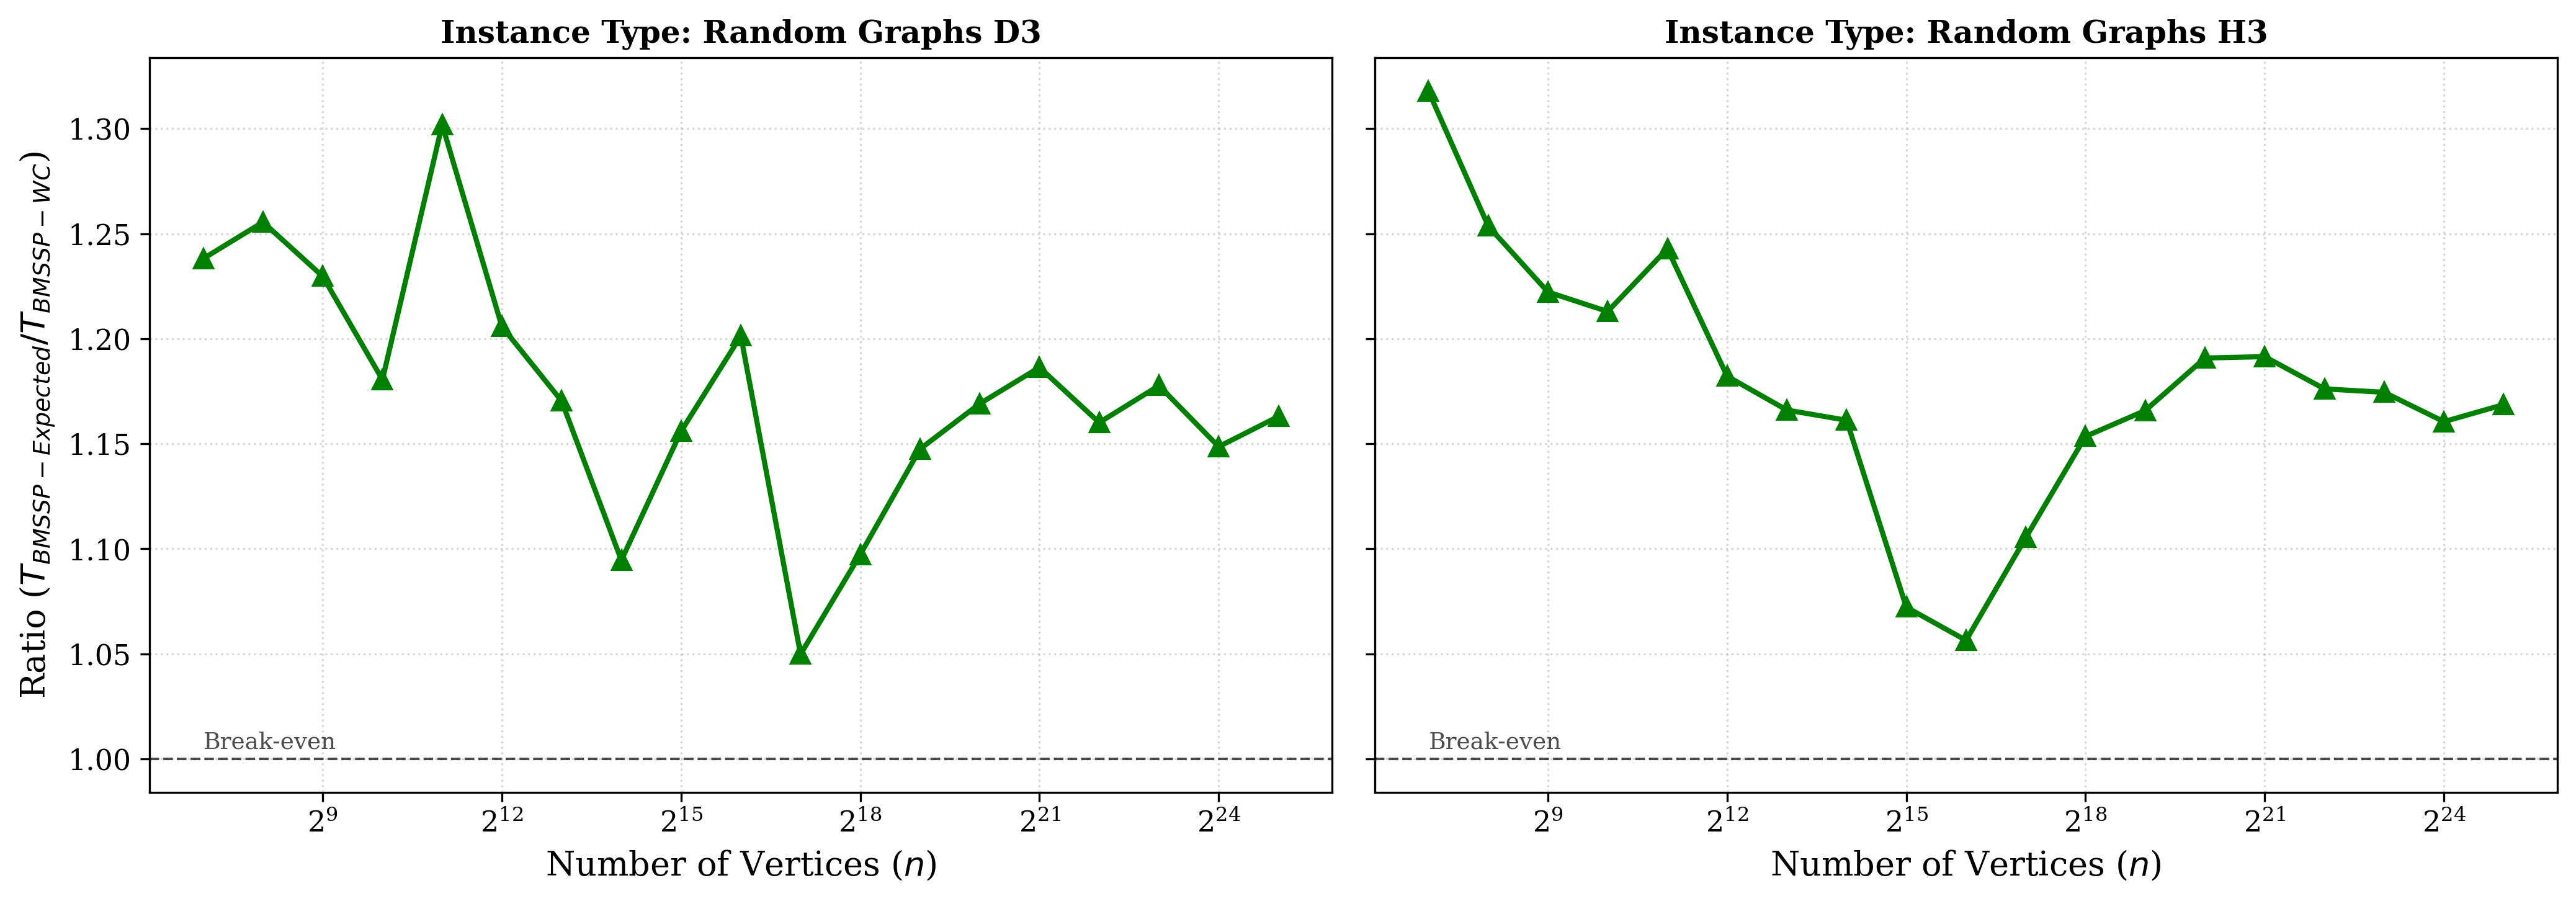

In [39]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

def plot_ratio(ax, df, title):
    
    ax.plot(df['Número de Vértices'], df['Ratio BMSSP-Expected / BMSSP'], 
            linestyle='-', marker='^', color='green', 
            linewidth=2, markersize=7, label='Speedup (Dijkstra / BMSPP)')
    
    ax.axhline(y=1, color='black', linestyle='--', linewidth=1, alpha=0.7)
    ax.text(df['Número de Vértices'].min(), 1.005, 'Break-even', fontsize=9, alpha=0.7)

    ax.set_xscale('log', base=2)
    ax.xaxis.set_major_formatter(ticker.LogFormatterMathtext(base=2.0))
    
    ax.set_yscale('linear') 
    
    ax.set_title(title, fontsize=12, fontweight='bold')
    ax.set_xlabel('Number of Vertices ($n$)')
    ax.grid(True, which="both", ls=":", alpha=0.5)


plot_ratio(ax1, df_d3, "Instance Type: Random Graphs D3")
ax1.set_ylabel('Ratio ($T_{BMSSP-Expected} / T_{BMSSP-WC}$)')

plot_ratio(ax2, df_h3, "Instance Type: Random Graphs H3")

plt.tight_layout()
plt.savefig('fig8.png', bbox_inches='tight')
plt.show()

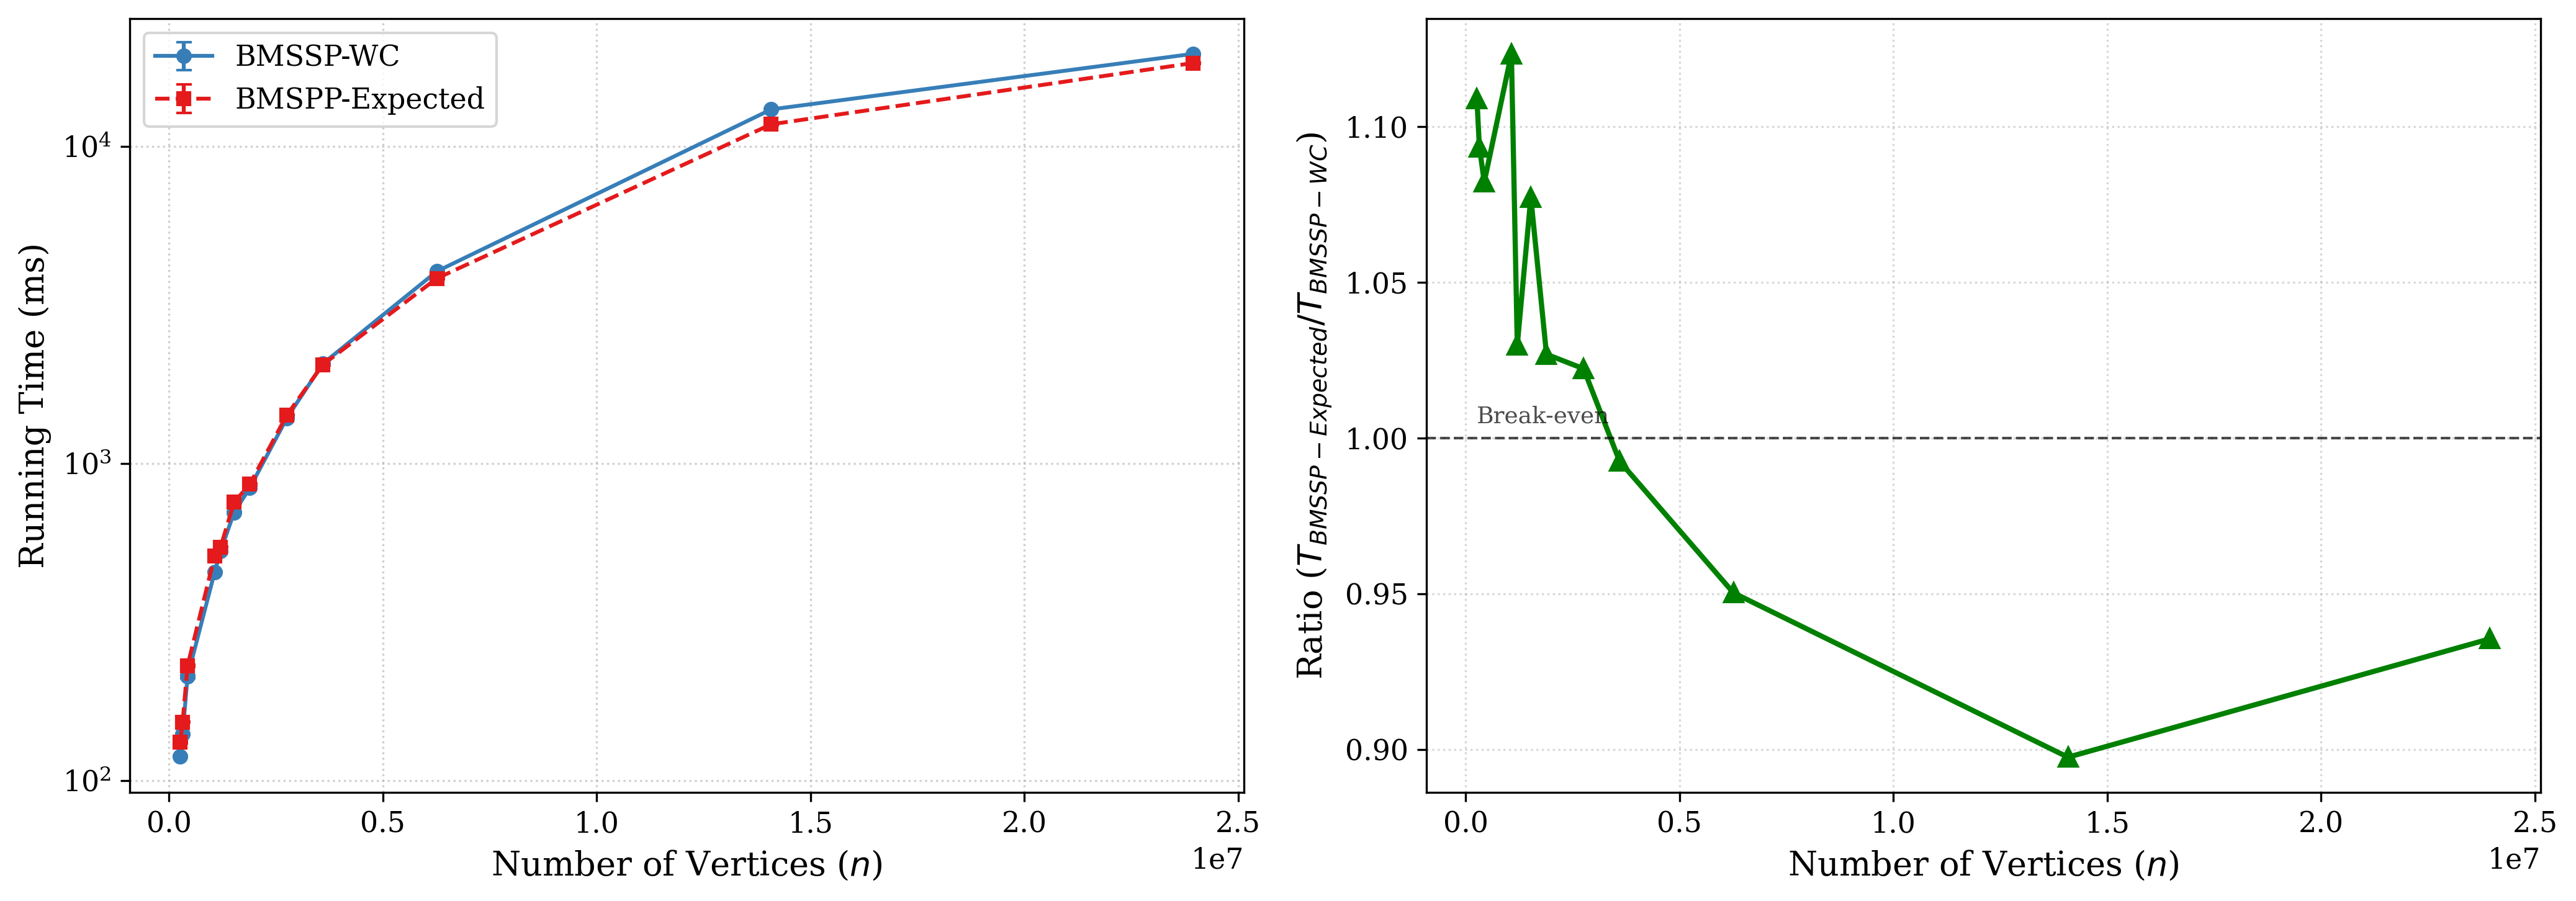

In [40]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5), sharey=False)

plot_data(ax1, df_USA, "")
ax1.legend()
ax1.yaxis.set_major_locator(ticker.LogLocator(base=10.0, subs=[1.0], numticks=20))
ax1.yaxis.set_major_formatter(ticker.LogFormatterMathtext(base=10.0))
ax1.yaxis.set_minor_locator(ticker.NullLocator())
ax1.grid(True, which='major', linestyle=':', alpha=0.6)
ax1.grid(False, which='minor')
ax1.set_xscale('linear')

ax1.set_ylabel('Running Time (ms)')

plot_ratio(ax2, df_USA, "")
ax2.set_ylabel('Ratio ($T_{BMSSP-Expected} / T_{BMSSP-WC}$)')
ax2.set_xscale('linear')

plt.tight_layout()
plt.savefig('fig9.png', bbox_inches='tight')
plt.show()

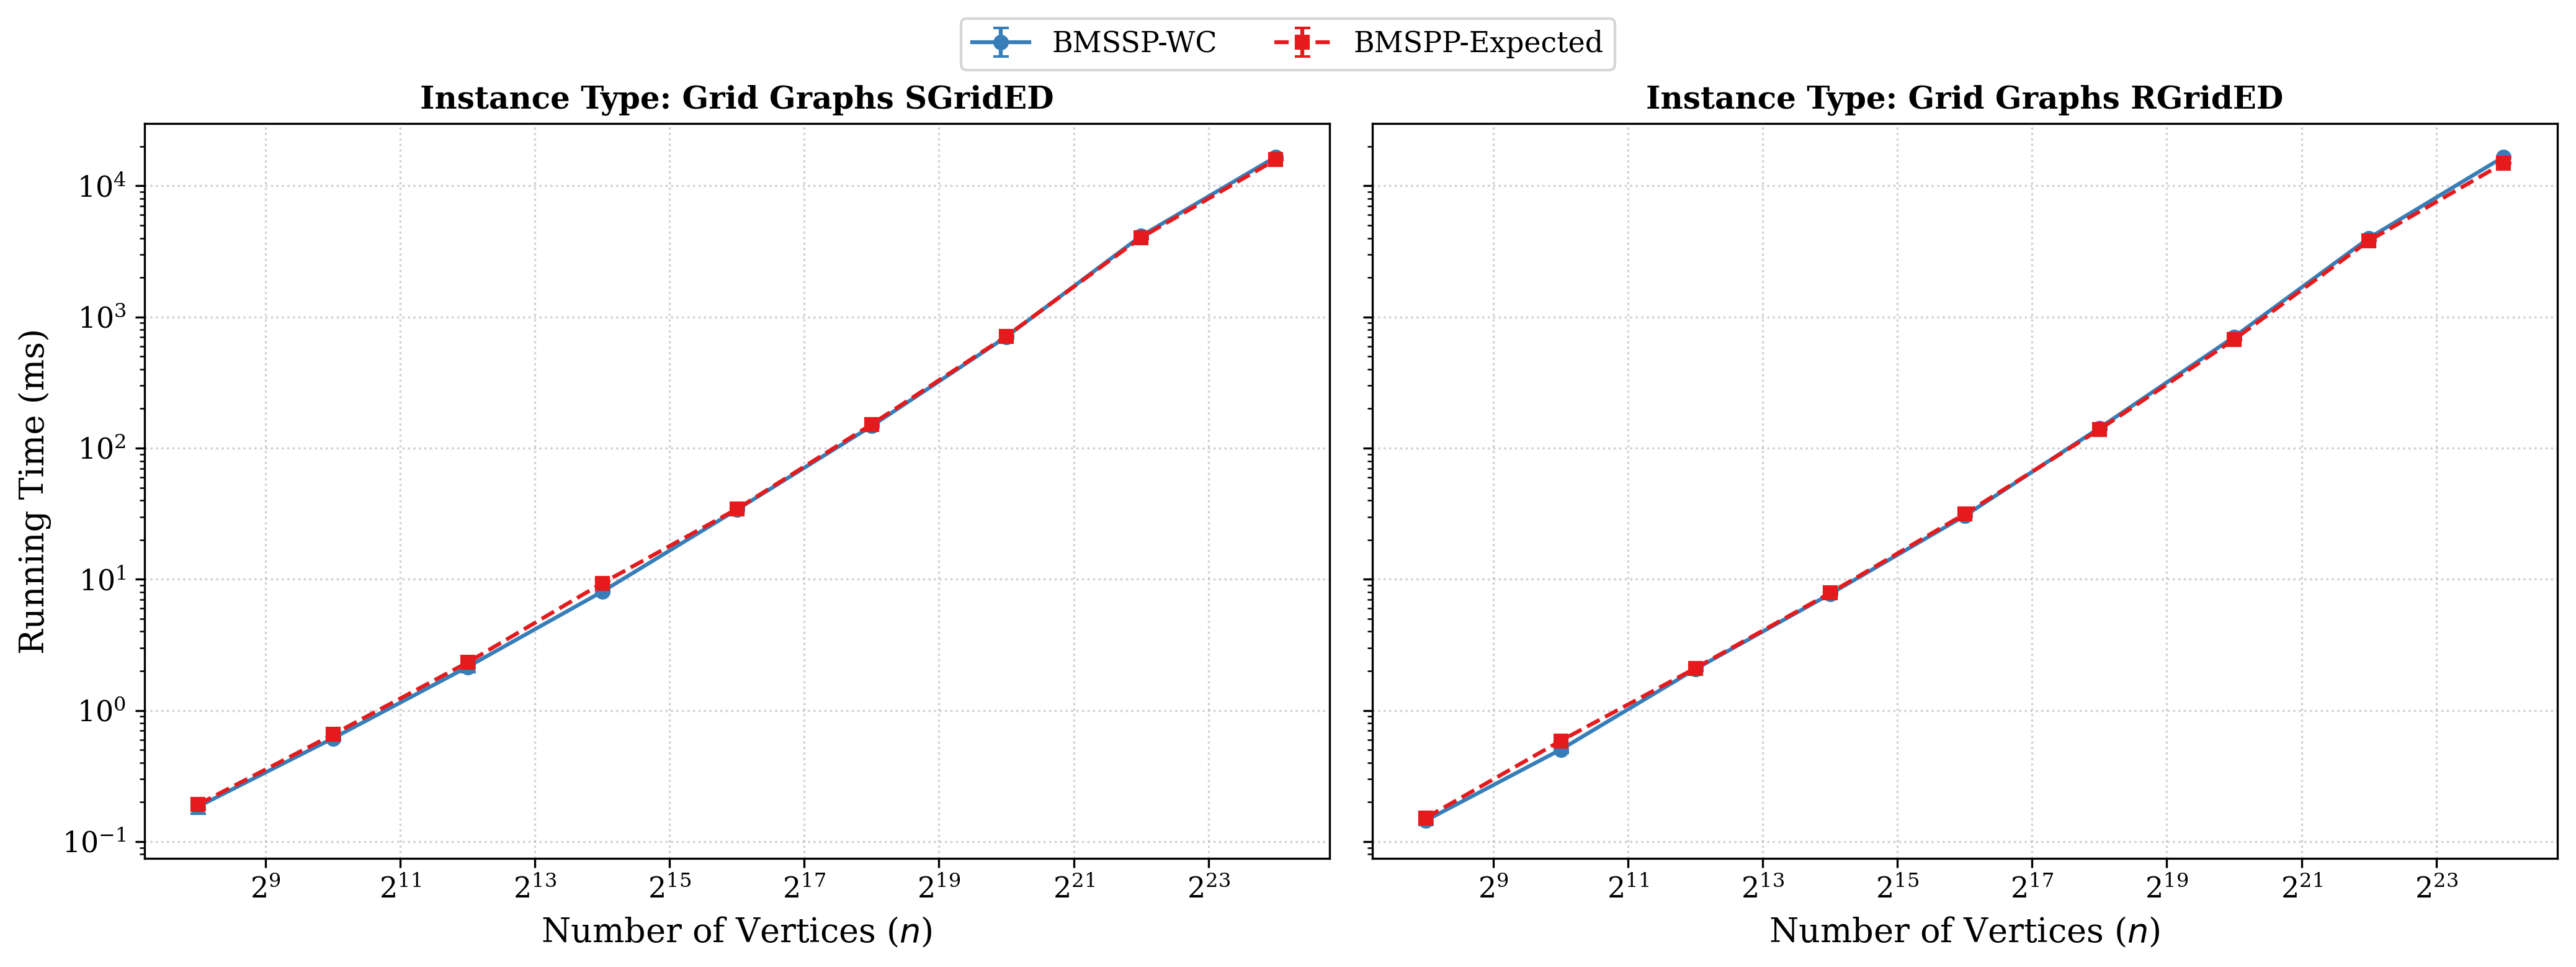

In [23]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

plot_data(ax1, df_SgridED, "Instance Type: Grid Graphs SGridED")
ax1.set_ylabel('Running Time (ms)')

ax1.grid(True, which='major', linestyle=':', alpha=0.6)
ax1.grid(False, which='minor')


plot_data(ax2, df_RgridED, "Instance Type: Grid Graphs RGridED")
ax2.grid(True, which='major', linestyle=':', alpha=0.6)
ax2.grid(False, which='minor')

handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=2, bbox_to_anchor=(0.5, 1.05))

plt.tight_layout()
plt.savefig('fig4.png', bbox_inches='tight')
plt.show()

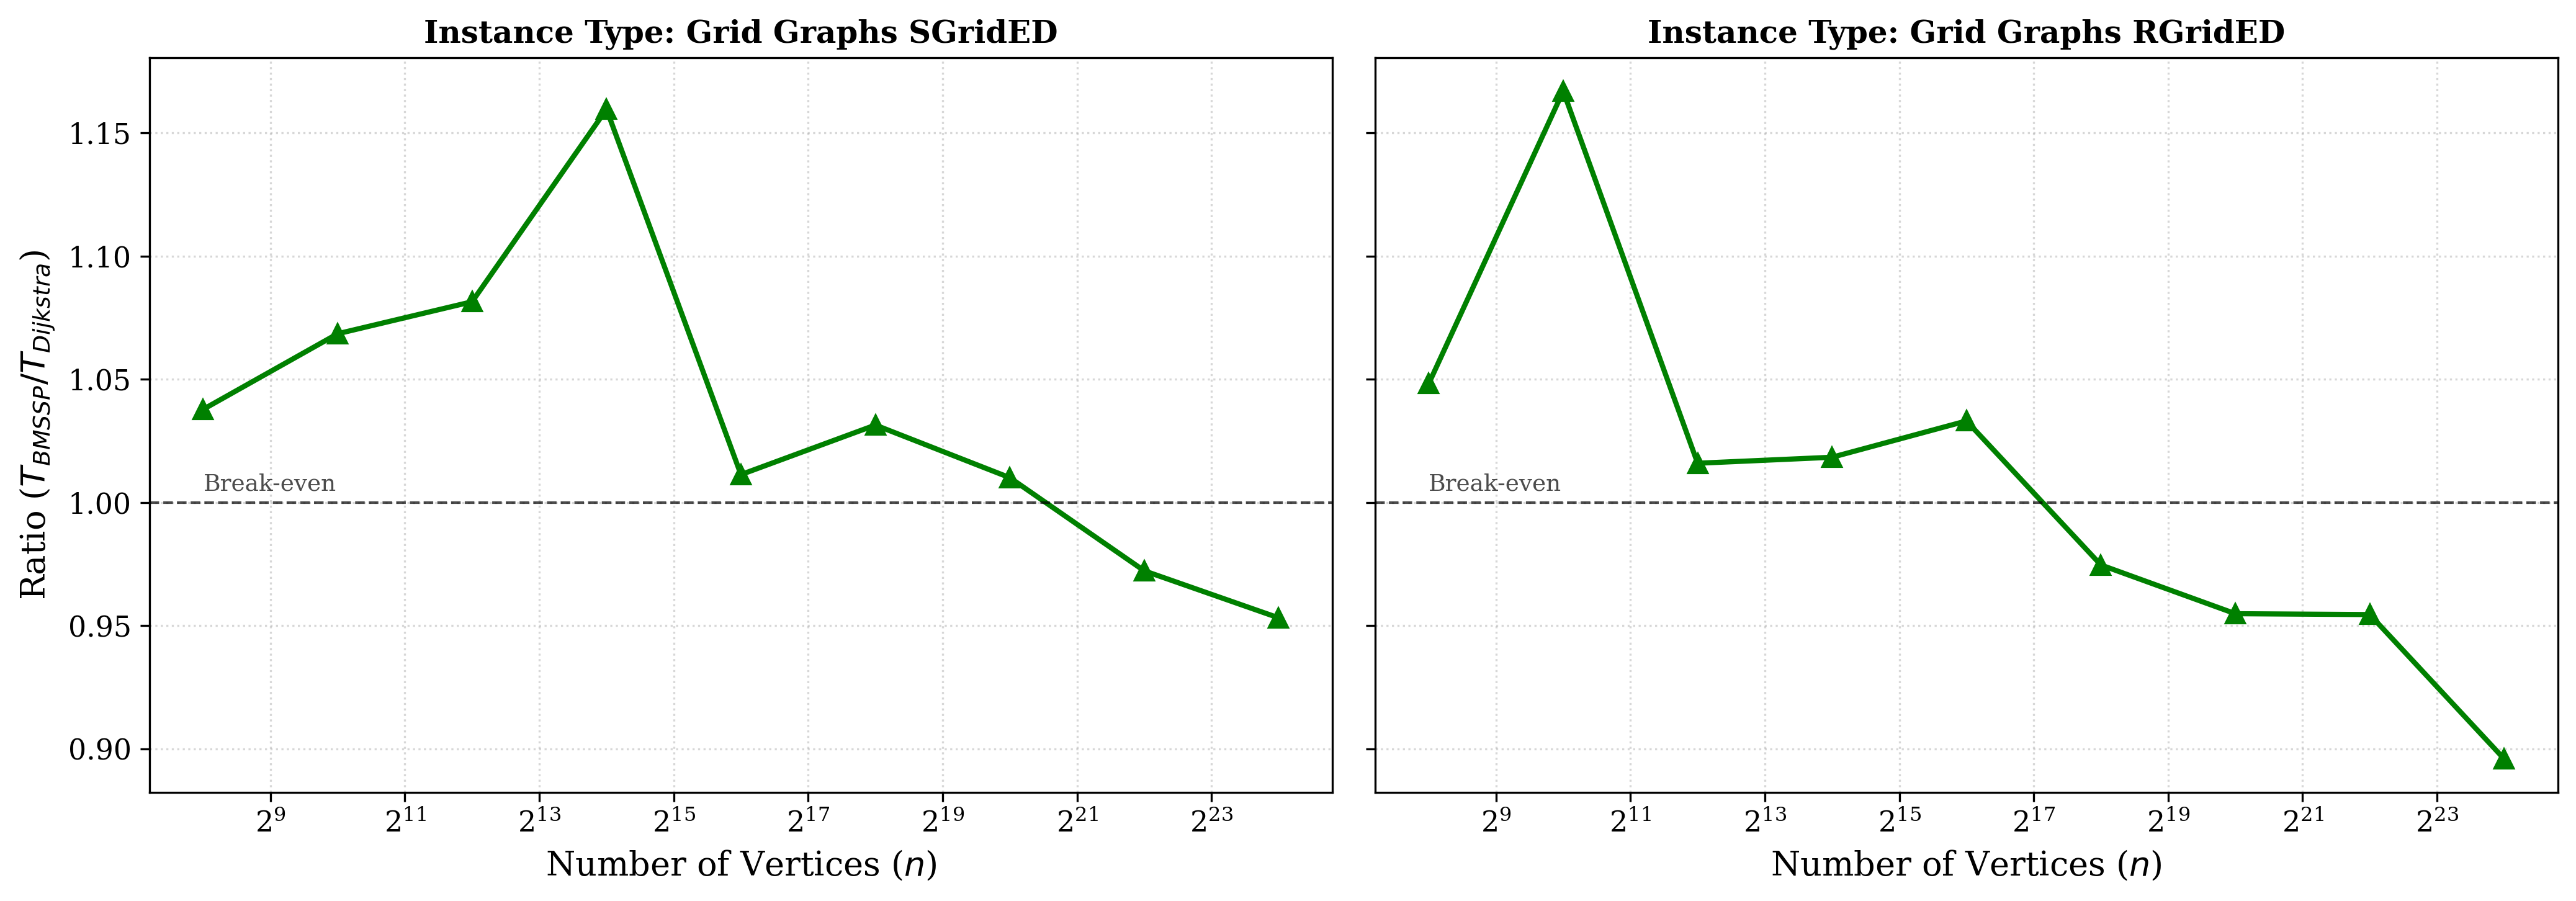

In [24]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5), sharey=True)


plot_ratio(ax1, df_SgridED, "Instance Type: Grid Graphs SGridED")
ax1.set_ylabel('Ratio ($T_{BMSSP} / T_{Dijkstra}$)')

plot_ratio(ax2, df_RgridED, "Instance Type: Grid Graphs RGridED")

plt.tight_layout()
plt.savefig('fig5.png', bbox_inches='tight')
plt.show()

# Experiment 2 - BMSSP-WC X BMSSP-CD

In [25]:
df_h3 = pd.read_csv("outputs/CD_results_H3/performance_summary_table.csv")
df_USA = pd.read_csv("outputs/CD_results_USA/performance_summary_table.csv")

In [26]:
df_USA

Graph File  Número de Vértices  Número de Arestas  \
0    USA-road-t.NY.gr              264346             733846   
1   USA-road-t.BAY.gr              321270             800172   
2   USA-road-t.COL.gr              435666            1057066   
3   USA-road-t.FLA.gr             1070376            2712798   
4    USA-road-t.NW.gr             1207945            2840208   
5    USA-road-t.NE.gr             1524453            3897636   
6   USA-road-t.CAL.gr             1890815            4657742   
7   USA-road-t.LKS.gr             2758119            6885658   
8     USA-road-t.E.gr             3598623            8778114   
9     USA-road-t.W.gr             6262104           15248146   
10  USA-road-t.CTR.gr            14081816           34292496   

    Tempo BMSSP (ms)  Desvio BMSSP (ms)  Tempo BMSSP-CD (ms)  \
0            118.030              0.887              489.892   
1            139.290              0.969              526.650   
2            209.183              0.704              699.045   
3            448.717              1.390             1878.650   
4            515.378              0.422             2106.777   
5            695.102              2.504             3279.082   
6            838.086              9.492             3541.601   
7           1373.042              3.923             5189.072   
8           2060.846              2.912             7258.218   
9           3936.441              6.345            13240.946   
10         12832.646             16.235            45127.778   

    Desvio BMSSP-CD (ms)  Ratio BMSSP-CD / BMSSP  
0                  1.289                4.150572  
1                  0.932                3.780961  
2                  1.644                3.341787  
3                  3.095                4.186715  
4                  5.389                4.087829  
5                  4.081                4.717411  
6                  6.947                4.225821  
7                  9.624                3.779252  
8                  3.926                3.521960  
9                 21.567                3.363685  
10                13.701                3.516639

In [27]:
def plot_data(ax, df, title):
    ax.errorbar(df['Número de Vértices'], df['Tempo BMSSP (ms)'], 
                yerr=df['Desvio BMSSP (ms)'], linestyle='-', marker='o', 
                color=color_dijkstra, capsize=3, label='BMSSP-WC', markersize=5)
    
    ax.errorbar(df['Número de Vértices'], df['Tempo BMSSP-CD (ms)'], 
                yerr=df['Desvio BMSSP-CD (ms)'], linestyle='--', marker='s', 
                color=color_bmspp, capsize=3, label='BMSPP-CD', markersize=5)
    
    # Configurações de Escala
    ax.set_xscale('log', base=2)
    ax.set_yscale('log')
    plt.gca().yaxis.set_major_locator(ticker.LogLocator(base=10.0, subs=[1.0], numticks=20))
    
    ax.xaxis.set_major_formatter(ticker.LogFormatterMathtext(base=2.0))
    ax.yaxis.set_major_formatter(ticker.LogFormatterMathtext(base=10.0))
    
    ax.set_title(title, fontsize=12, fontweight='bold')
    ax.set_xlabel('Number of Vertices ($n$)')
    ax.grid(True, which="both", ls=":", alpha=0.5)

In [28]:
def plot_ratio(ax, df, title):
    
    ax.plot(df['Número de Vértices'], df['Ratio BMSSP-CD / BMSSP'], 
            linestyle='-', marker='^', color='green', 
            linewidth=2, markersize=7, label='Speedup (BMSPP-CD / BMSPP-WC)')
    
    ax.axhline(y=1, color='black', linestyle='--', linewidth=1, alpha=0.7)
    ax.text(df['Número de Vértices'].min(), 1.005, 'Break-even', fontsize=9, alpha=0.7)

    ax.set_xscale('log', base=2)
    ax.xaxis.set_major_formatter(ticker.LogFormatterMathtext(base=2.0))
    
    ax.set_yscale('linear') 
    
    ax.set_title(title, fontsize=12, fontweight='bold')
    ax.set_xlabel('Number of Vertices ($n$)')
    ax.grid(True, which="both", ls=":", alpha=0.5)

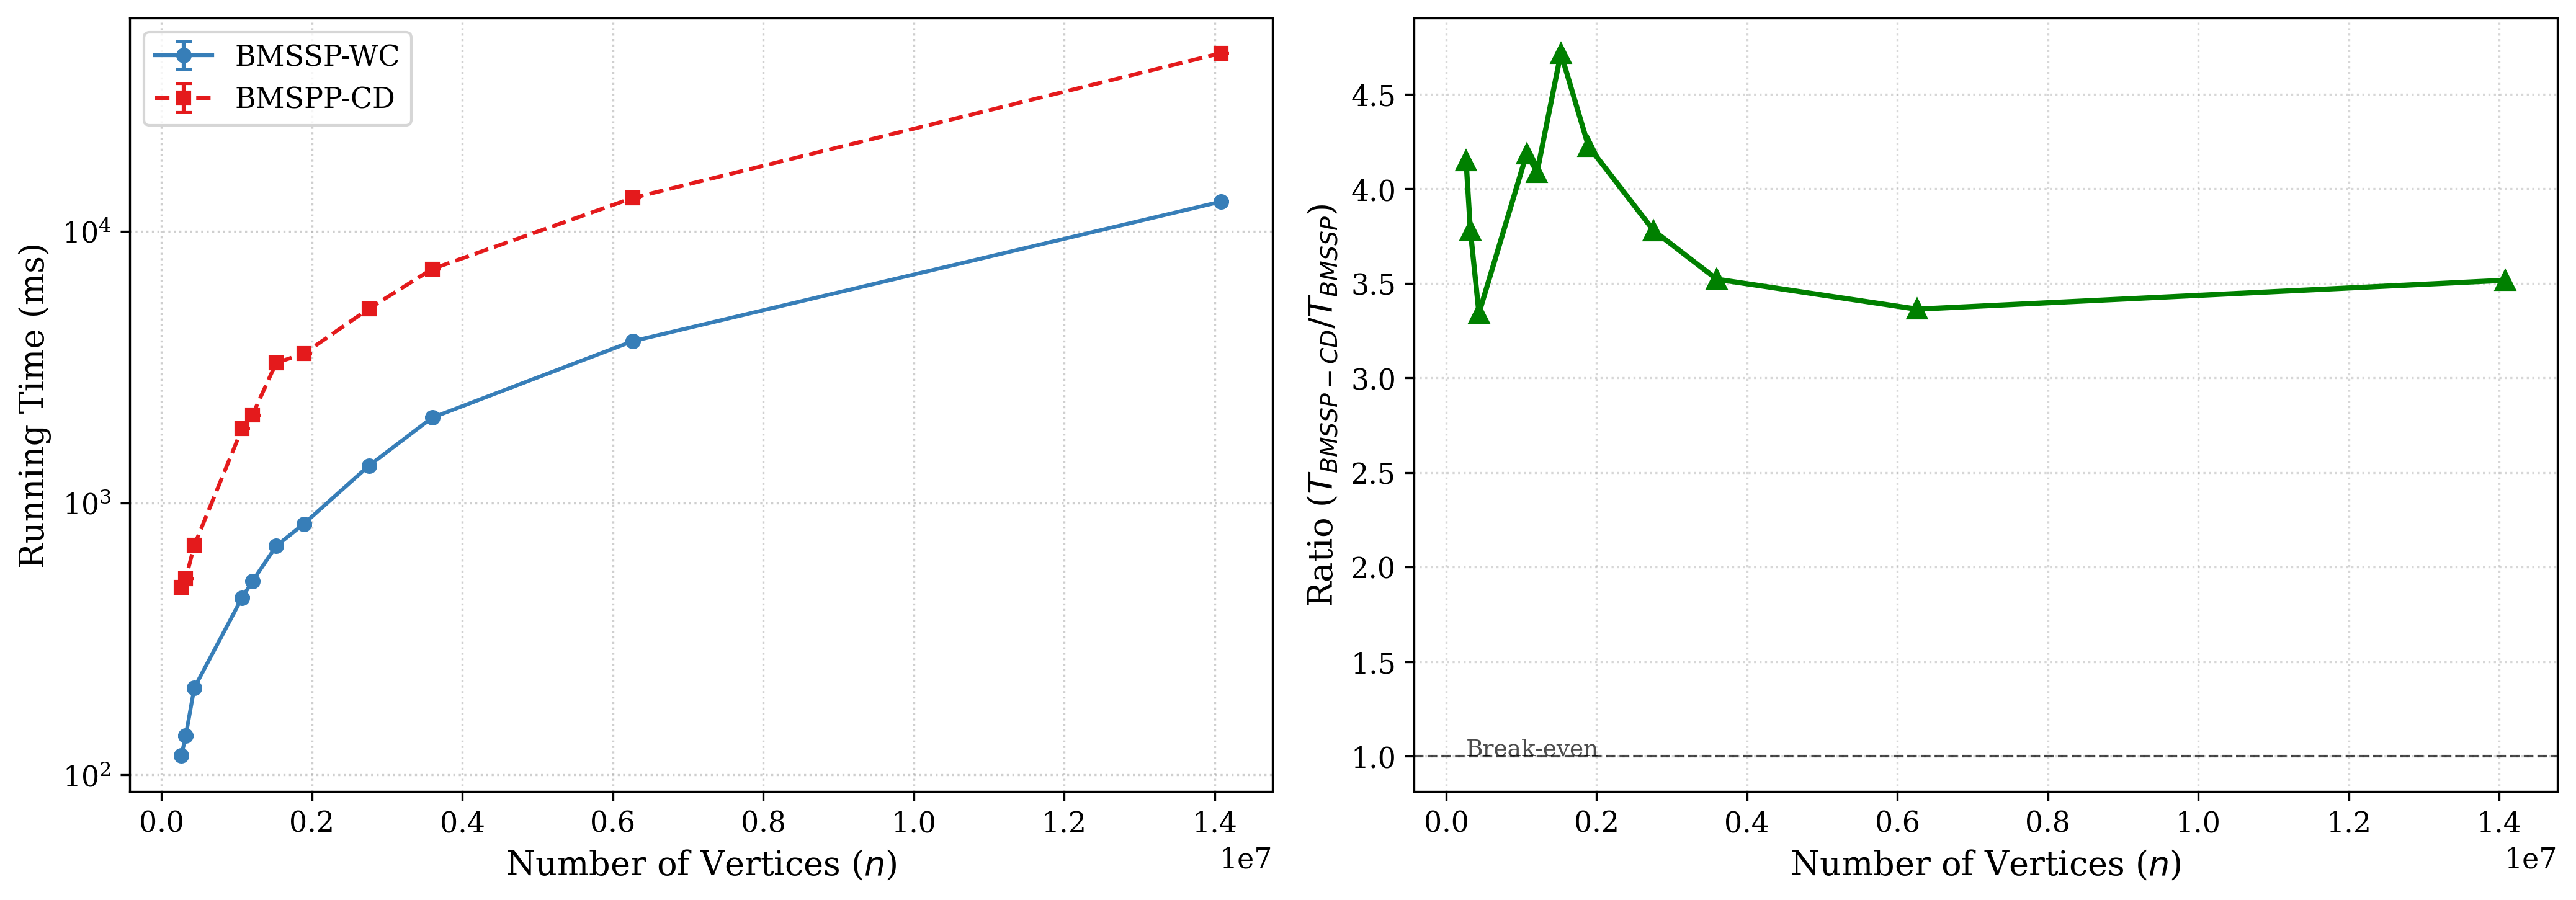

In [29]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5), sharey=False)

plot_data(ax1, df_USA, "")
ax1.legend()
ax1.yaxis.set_major_locator(ticker.LogLocator(base=10.0, subs=[1.0], numticks=20))
ax1.yaxis.set_major_formatter(ticker.LogFormatterMathtext(base=10.0))
ax1.yaxis.set_minor_locator(ticker.NullLocator())
ax1.grid(True, which='major', linestyle=':', alpha=0.6)
ax1.grid(False, which='minor')
ax1.set_xscale('linear')

ax1.set_ylabel('Running Time (ms)')

plot_ratio(ax2, df_USA, "") 
ax2.set_ylabel('Ratio ($T_{BMSSP-CD} / T_{BMSSP}$)')
ax2.set_xscale('linear')

plt.tight_layout()
plt.savefig('fig6.png', bbox_inches='tight')
plt.show()

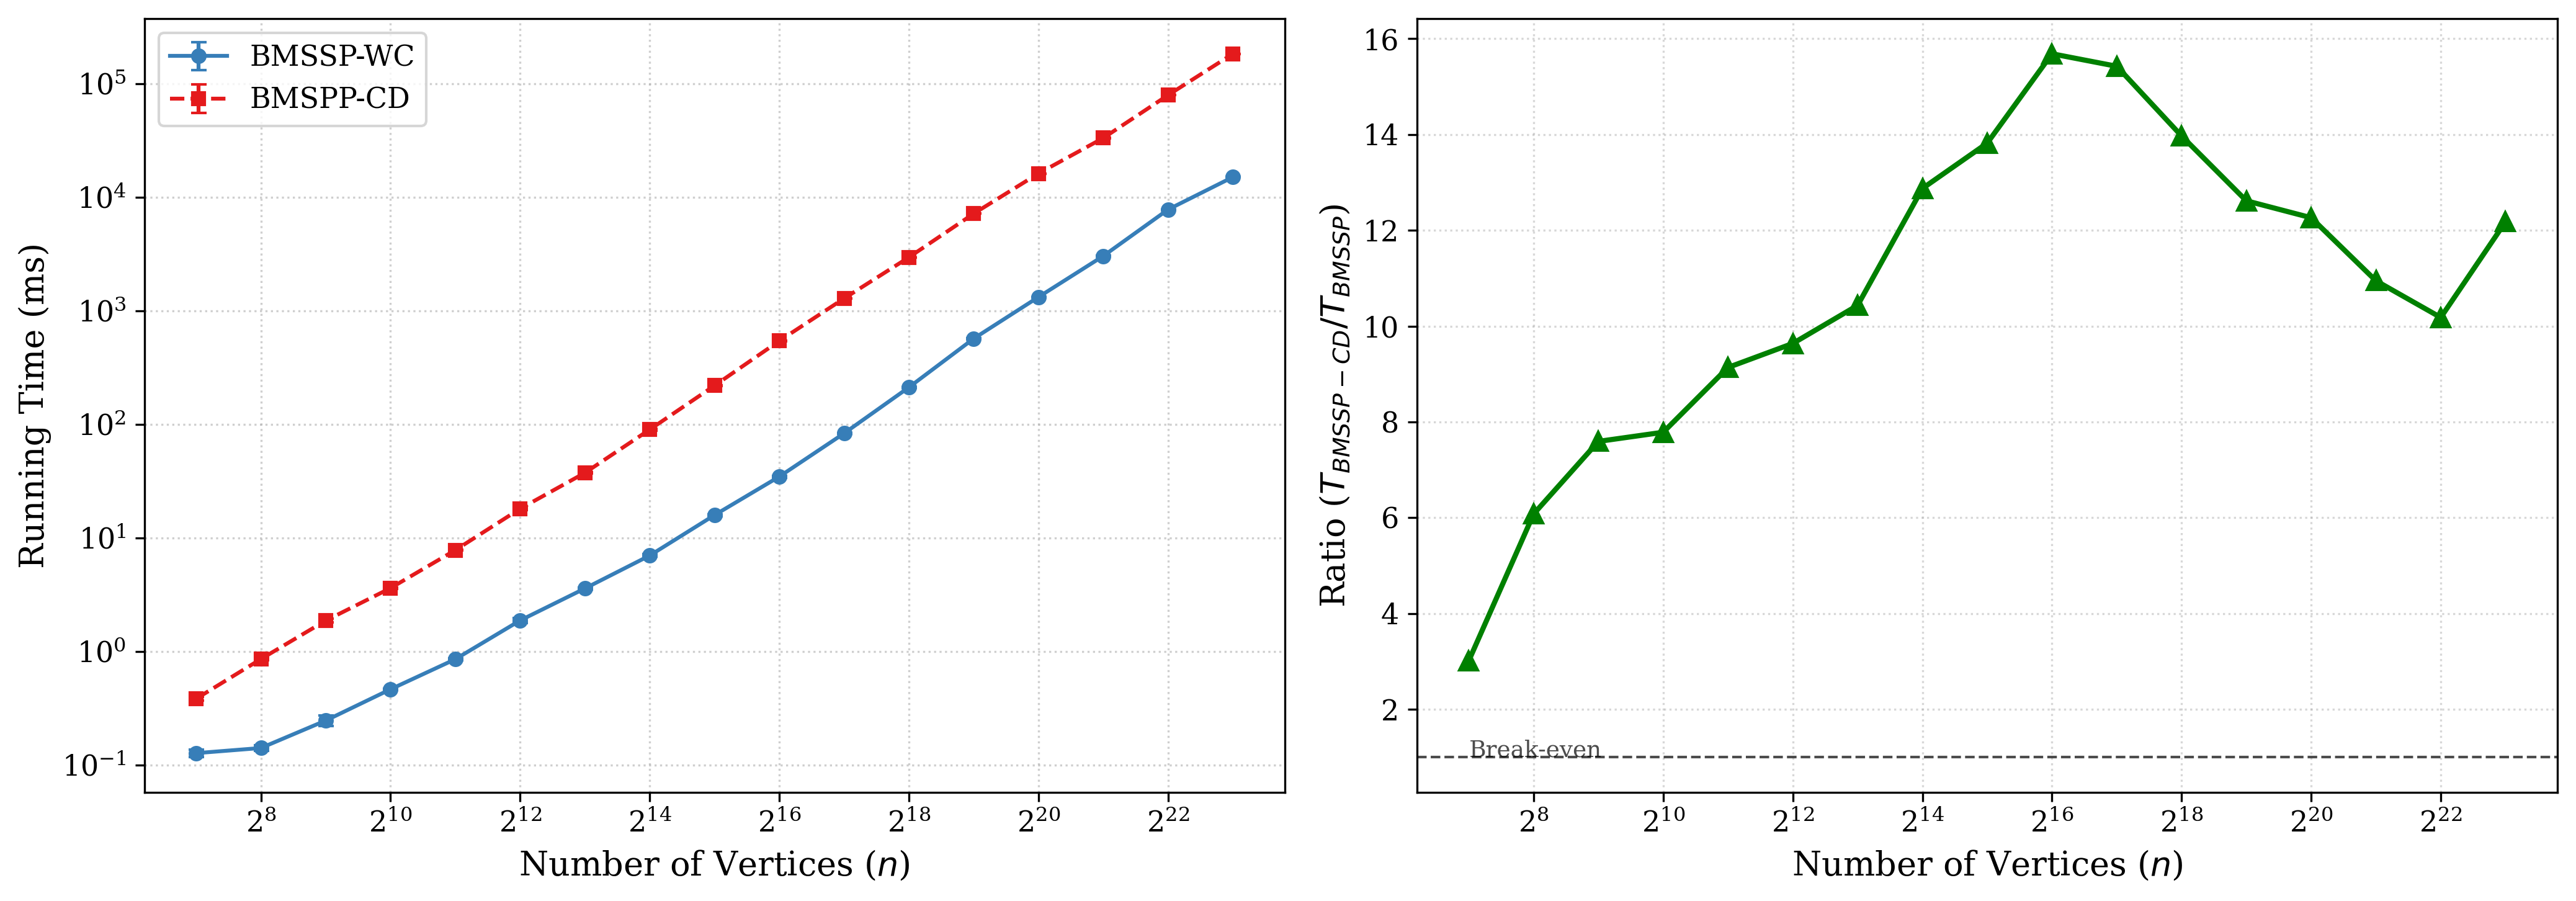

In [30]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5), sharey=False)

plot_data(ax1, df_h3, "")
ax1.legend()
ax1.yaxis.set_major_locator(ticker.LogLocator(base=10.0, subs=[1.0], numticks=20))
ax1.yaxis.set_major_formatter(ticker.LogFormatterMathtext(base=10.0))
ax1.yaxis.set_minor_locator(ticker.NullLocator())
ax1.grid(True, which='major', linestyle=':', alpha=0.6)
ax1.grid(False, which='minor')
ax1.set_xscale('log',base=2)

ax1.set_ylabel('Running Time (ms)')

plot_ratio(ax2, df_h3, "")
ax2.set_ylabel('Ratio ($T_{BMSSP-CD} / T_{BMSSP}$)')
ax2.set_xscale('log',base=2)

plt.tight_layout()
plt.savefig('fig7.png', bbox_inches='tight')
plt.show()